# Census Income Project 03

### Problem Statement:

This data was extracted from 1994 Census bureau database by Ronny Kohvi and Barry Becker (Data Mining and Visualization, Silicon Graphics).A Set of reasonably cleanrecords was extracted using the following conditions:((AAGE >16) %% (AGI>100) && (AFNLWGT>1) &&)(HRSWK>0). 
### The prediction task is to determine whether a per son makes over $50k a year

### Importing Dataset

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [55]:
# Loading dataset
df = pd.read_csv(r'C:\Users\RSarkar\Desktop\phase 1 project\census_income.csv')

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [56]:
#Let's see the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [57]:
df.shape #shape of data

(32560, 15)

In [58]:
df.head() #to see 5 first row of dataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### EDA

In [59]:
df.isnull().sum() # Checking the null value

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Great! Dataset has no null value

In [60]:
df.shape

(32560, 15)

In [61]:
#Checking Dublicate values
df.drop_duplicates(inplace=True)

In [62]:
#Checking the datatype of the columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Observations: 
    
    we can see that categorical columns are more than numeric columns. There are 9 categorical columns where 6 are continuous columns
    
    Target column is incategorical in nature but we have to treat for model
       

In [63]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [64]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Total 15 features and labels in the dataset, in which only 6 are continuous columns

Capital gain & Capital loss have no of skewness and as compare to std max number is more which is not a good sign

we see that the age columns shows the 75% quantile is 48 ans max is 90 meaning there are ouliers in the column

we see the same for hours per week @ 99 so we need to treat them to make a proper  prediction


In [65]:
# Checking to see the unique values in the columns

df['Age'].nunique() # different ages category

73

In [66]:
df['Workclass'].unique() 

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

There are different 8 no. of workclass categories

In [68]:
df['Fnlwgt'].nunique() 

21647

we see the different categories , we need to use ordinal encoder for this as more weighs for someone who travels more

In [69]:
df['Education'].unique() 

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [71]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [72]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [73]:
df['Occupation'].unique() # we have 15 different occupations here 

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [74]:
df['Race'].unique()# There are 5 categories in Race

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [75]:
df['Sex'].unique() 

array([' Male', ' Female'], dtype=object)

In [77]:
df['Capital_gain'].nunique() #There are 119 unique values in capital gain

119

In [78]:
df['Capital_loss'].nunique() 

92

In [79]:
df['Hours_per_week'].nunique()

94

The working hours of different value per people

In [80]:
df['Native_country'].unique() 

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Detail of native country from where the person belongs to

In [81]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

the target coulns which shows if there are earning more or less than 50k per year

We have individually bifercate the columns and label for more details, and we see number of variations in each columns

In [82]:
# Checking to see if any of the values in Target  is white spaces

df.loc[data['Income'] == " "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


Great! No whitespace is available in target column

### Splitting the columns with categorical and numerica data

In [83]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features : {}".format(len(numerical_features),numerical_features))

print("'\n'We have {} categorical_features : {}".format(len(categorical_features),categorical_features))

We have 6 numerical features : ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
'
'We have 9 categorical_features : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [84]:
df_visualization_continuous=df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']].copy()

In [85]:
df_visualization_nominal=df[['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']]

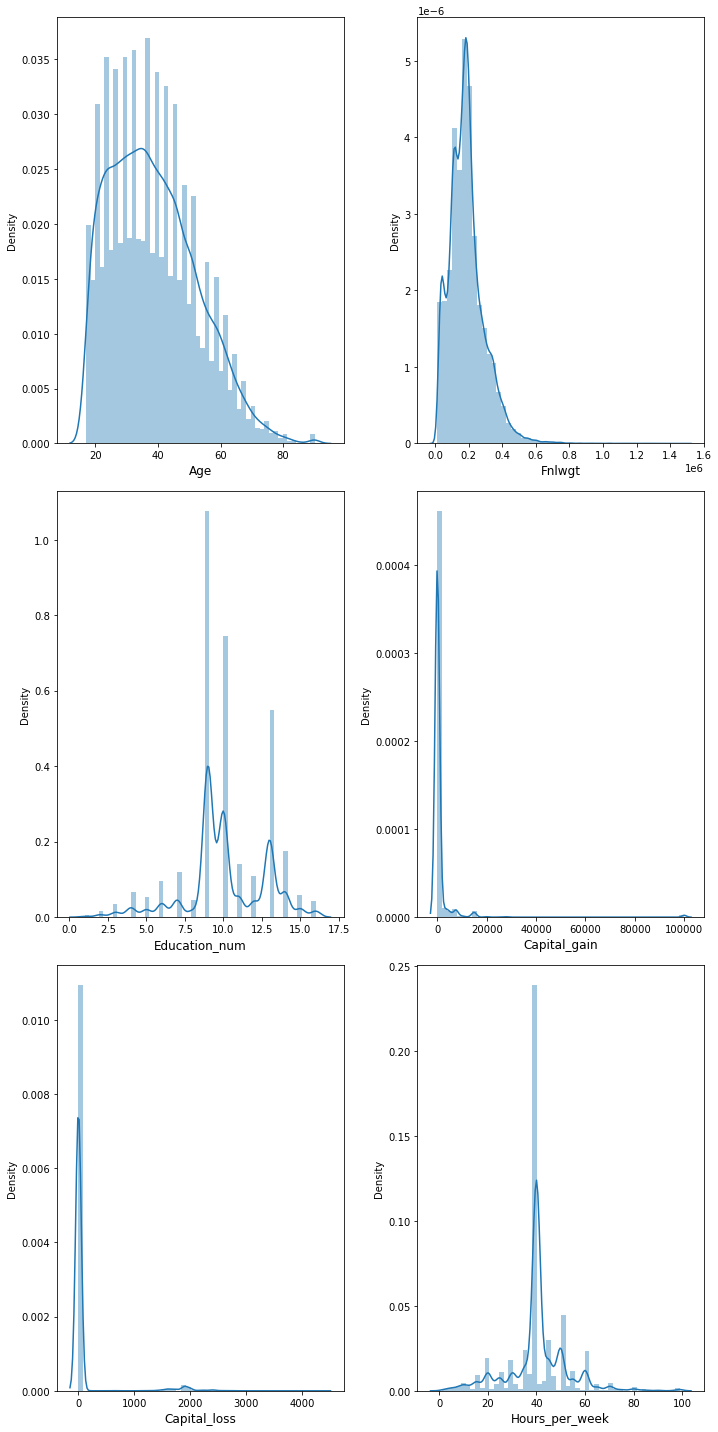

In [86]:
# Let's visualize the continuous features
#Lets see how the data is distributed for every column

plt.figure(figsize =(10,20), facecolor = 'white')
plotnumber = 1

for column in df_visualization_continuous:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df_visualization_continuous[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()


We see that the columns 'Age', 'Capital gain ', 'apital loss', ' all are skewed to the right where capital gain and loss the value are very similar patterns

In [87]:
# Lets code the target variable so it can be used as continuous feature, for '>50k = 1' and for '<50k = 0'

df['Income'] = df['Income'].factorize(['>50k','<=50k'])[0]

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


# Visualizing the Target Variable

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


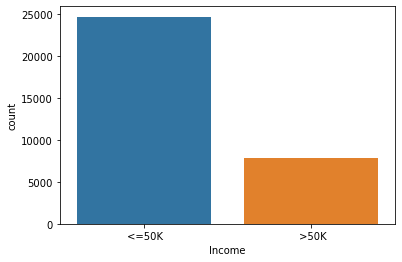

In [111]:
ax = sns.countplot(x='Income',data = df_visualization_nominal)
print(df_visualization_nominal['Income'].value_counts())


0    24697
1     7839
Name: Income, dtype: int64


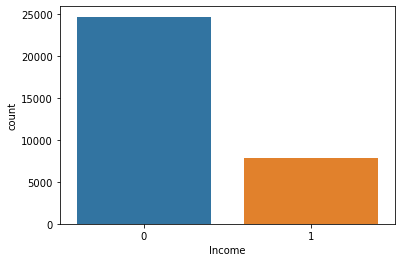

In [90]:
ax = sns.countplot(x='Income',data = df)
print(df['Income'].value_counts())

In [92]:
import plotly.graph_objs as go
import plotly.offline as py
less_50 = df[(df['Income'] != 0)]
more_50 = df[(df['Income'] == 0)]

trace = go.Pie(labels = ['less than 50k', 'more than 50k'], values = df['Income'].value_counts(), 
               textfont=dict(size=15),
               marker=dict(colors=['#B9C0C9','yellow'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Differentiate of Income variable')          
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

There is a great difference between earnings Income variable, less than 50k and more than 50k

In [ ]:
#Let's seperatly graph the data for better analysis



<AxesSubplot:xlabel='Age', ylabel='Density'>

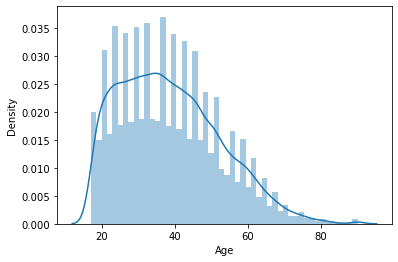

In [93]:
sns.distplot(df_visualization_continuous['Age'],kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

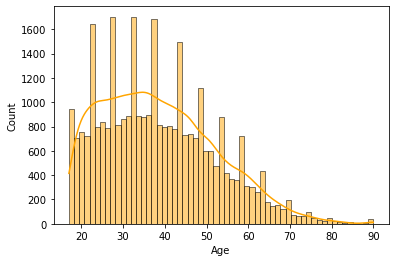

In [94]:
sns.histplot(df_visualization_continuous['Age'],kde=True,color='Orange')

We see that the data is right skewed and we see some outliers in the dataset , we see the max age is betweem 25 -45 approx

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

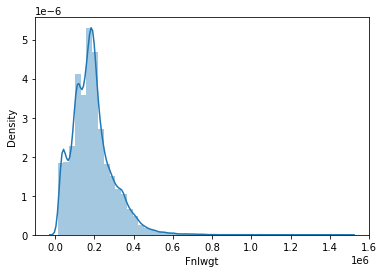

In [95]:
sns.distplot(df['Fnlwgt'],kde=True)

<AxesSubplot:xlabel='Fnlwgt', ylabel='Count'>

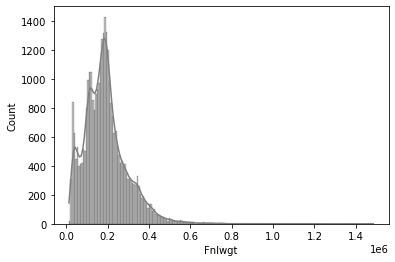

In [99]:
sns.histplot(df['Fnlwgt'],kde=True,color = "gray")

The data is almost right skewed and the outliers also affecting  and we need to treat them

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

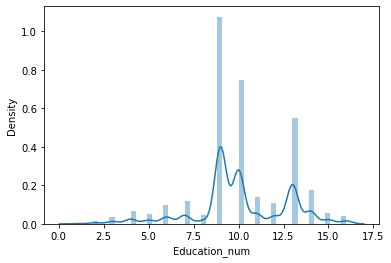

In [101]:
sns.distplot(df['Education_num'],kde=True)

<AxesSubplot:xlabel='Education_num', ylabel='Count'>

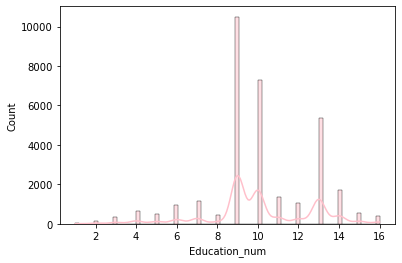

In [100]:
sns.histplot(df['Education_num'],kde=True,color='pink')

We see that this column has categorical data as in classes , where we see 9,10 is the highest

<AxesSubplot:xlabel='Education_num', ylabel='count'>

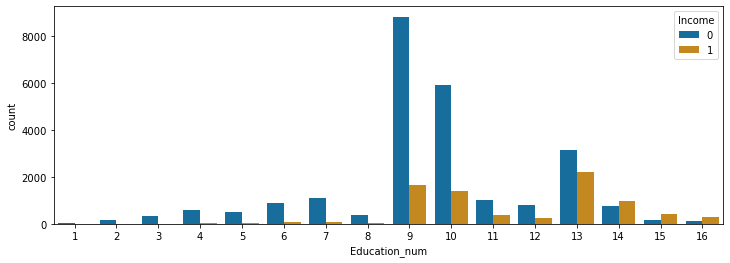

In [102]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Education_num", hue="Income", data=df, palette="colorblind")

We see that the higher the value more the no of people getting more than 50k so we can say higher education num equals higher salary

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

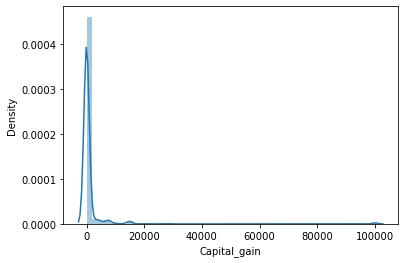

In [103]:
sns.distplot(df['Capital_gain'],kde=True)

<AxesSubplot:xlabel='Capital_gain', ylabel='Count'>

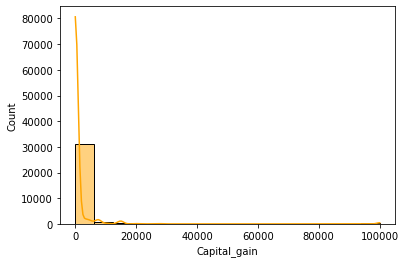

In [104]:
sns.histplot(df['Capital_gain'],kde=True,color='orange')

We see that this columns is highly skewed to the right and we see that the values are all much much nearer to 0 and we cannot see what the spreadis if there is due to this , we will need to treat the column

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

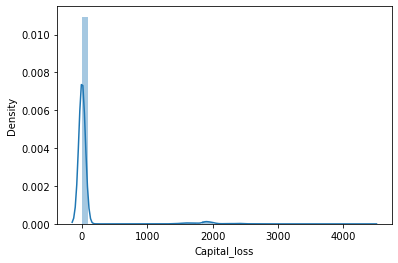

In [105]:
sns.distplot(df['Capital_loss'],kde=True)

<AxesSubplot:xlabel='Capital_loss', ylabel='Count'>

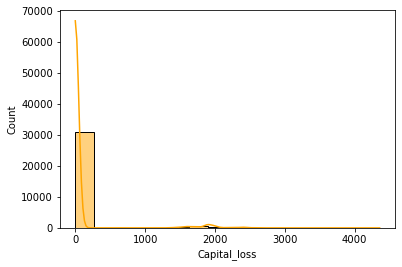

In [106]:
sns.histplot(df['Capital_loss'],kde=True,color='orange')

We see uniformity in the pattern of capital loss with capital gain and we need to treat the column for better model

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

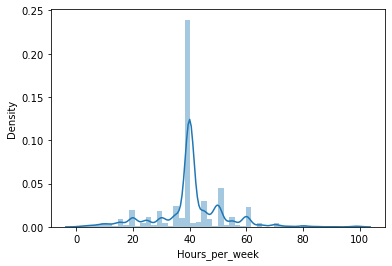

In [108]:
sns.distplot(df['Hours_per_week'],kde=True)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Count'>

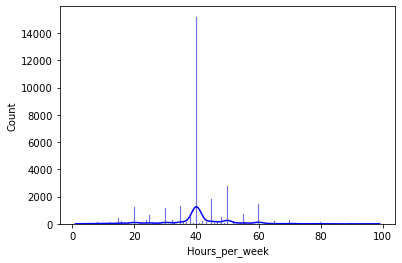

In [109]:
sns.histplot(df['Hours_per_week'],kde=True,color='blue')

We see that the data is somewhat normal but  number of people in 40 hrs per week is so high.

# Visualization of the categorical features

In [114]:
import plotly.graph_objs as go
import plotly.offline as py
less_50 = df[(df['Income'] != 0)]
more_50 = df[(df['Income'] == 0)]

trace = go.Pie(labels = ['less than 50k', 'more than 50k'], values = df['Income'].value_counts(), 
               textfont=dict(size=15),
               marker=dict(colors=['#B9C0C9','yellow'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Distribution of Income variable')          
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


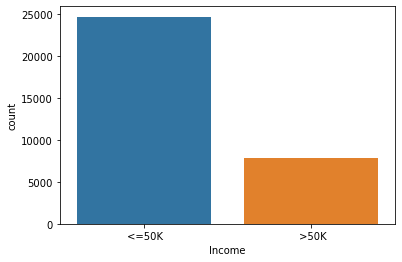

In [115]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Income',data = df_visualization_nominal)
print(df_visualization_nominal['Income'].value_counts())

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


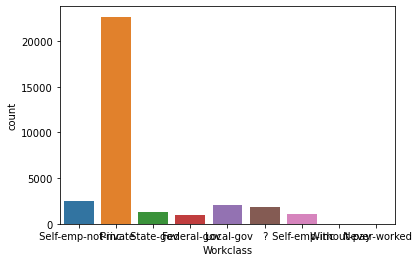

In [116]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Workclass',data = df_visualization_nominal)
print(df_visualization_nominal['Workclass'].value_counts())

We see the majority are in private and the least is never worked

<AxesSubplot:xlabel='Workclass', ylabel='count'>

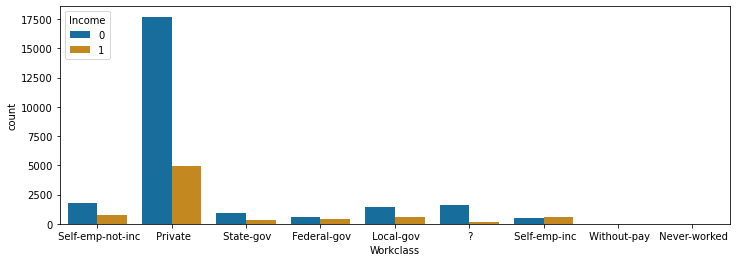

In [117]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Workclass", hue="Income", data=df, palette="colorblind")

We see that the majority of >50k earners are in private , but according to ration , self employed people are earning more than people earning less, same goes with federal employees

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


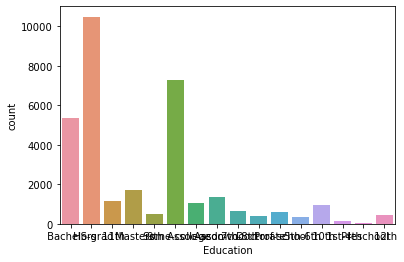

In [118]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Education',data = df_visualization_nominal)
print(df_visualization_nominal['Education'].value_counts())

<AxesSubplot:xlabel='Education', ylabel='count'>

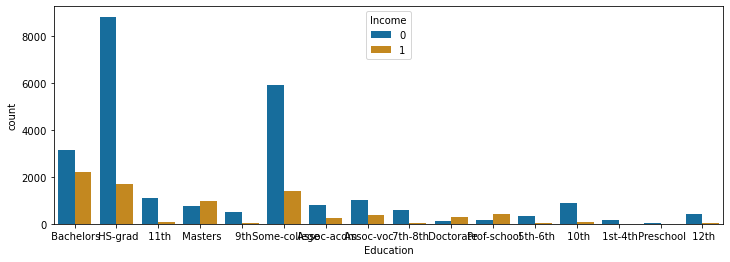

In [119]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Education", hue="Income", data=df, palette="colorblind")

WE see that majority of >50 k in HS grad and by ratio masters are also the highest which means the higher people study the higher they get paid as per the dataset

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


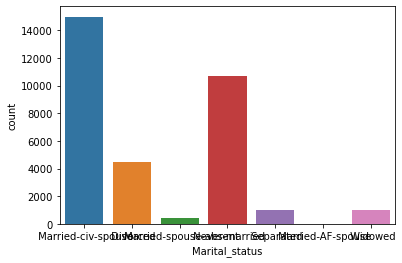

In [120]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Marital_status',data = df_visualization_nominal)
print(df_visualization_nominal['Marital_status'].value_counts())

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

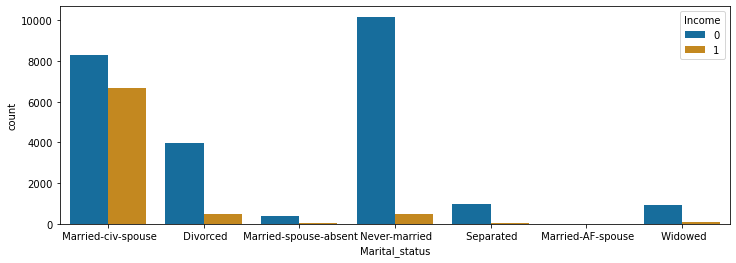

In [121]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Marital_status", hue="Income", data=df, palette="colorblind")

We see that the max of the people >50k is in married civ spouse meaning the ones btw 30 to 40 approx as seen before in other features is having the highest while young people just starting out are earning less than 50k

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


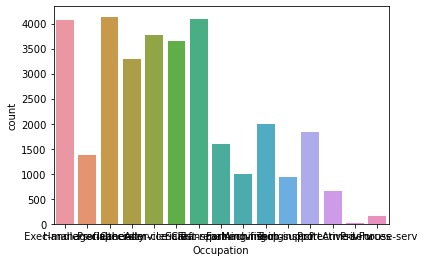

In [122]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Occupation',data = df_visualization_nominal)
print(df_visualization_nominal['Occupation'].value_counts())

<AxesSubplot:xlabel='Occupation', ylabel='count'>

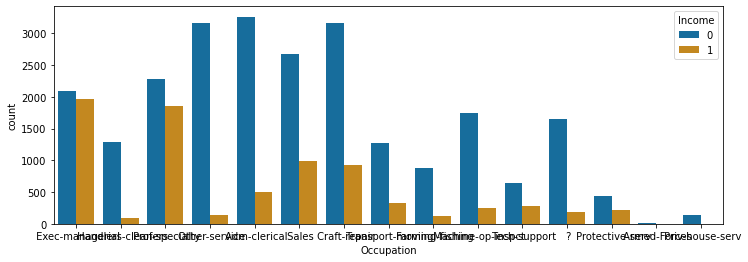

In [123]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Occupation", hue="Income", data=df, palette="colorblind")

We see that the max of >50k are in Exec-mangerial and Prof_speciality which are white collar jobs and therefore earn the most

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


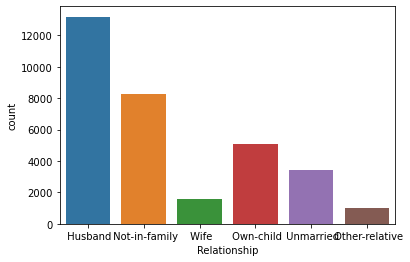

In [124]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Relationship',data = df_visualization_nominal)
print(df_visualization_nominal['Relationship'].value_counts())

<AxesSubplot:xlabel='Relationship', ylabel='count'>

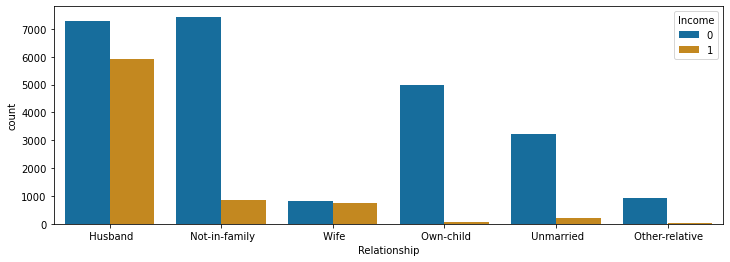

In [125]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Relationship", hue="Income", data=df, palette="colorblind")

We see the graph where the husband class has the highest people in >50k

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


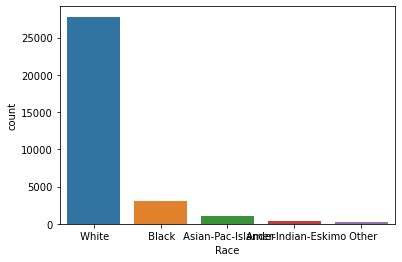

In [126]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Race',data = df_visualization_nominal)
print(df_visualization_nominal['Race'].value_counts())

<AxesSubplot:xlabel='Race', ylabel='count'>

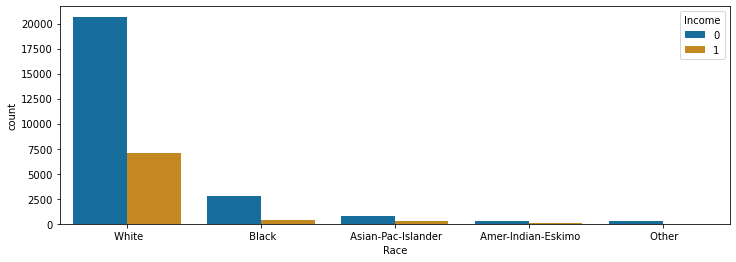

In [127]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Race", hue="Income", data=df, palette="colorblind")

We see that white race earning the highest >50k and the data set has the highest as white @ 83.7%

 Male      21774
 Female    10762
Name: Sex, dtype: int64


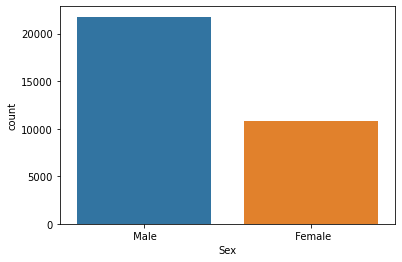

In [128]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Sex',data = df_visualization_nominal)
print(df_visualization_nominal['Sex'].value_counts())

<AxesSubplot:xlabel='Sex', ylabel='count'>

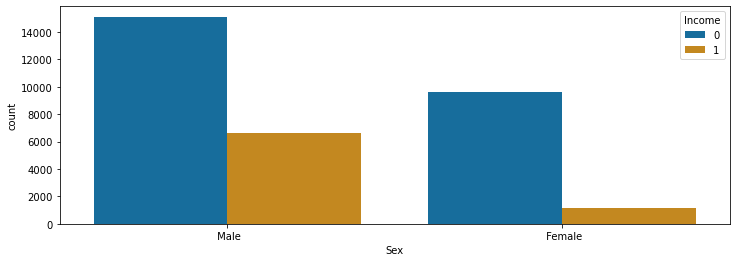

In [129]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Sex", hue="Income", data=df, palette="colorblind")

As seen in graph males make up of double the female so they have the higher >50k earners

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

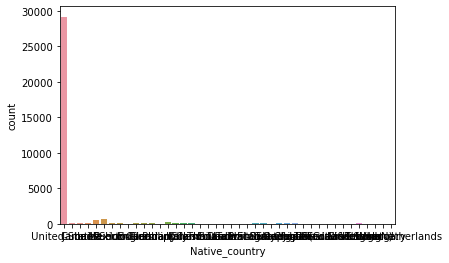

In [130]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='Native_country',data = df_visualization_nominal)
print(df_visualization_nominal['Native_country'].value_counts())

<AxesSubplot:xlabel='Native_country', ylabel='count'>

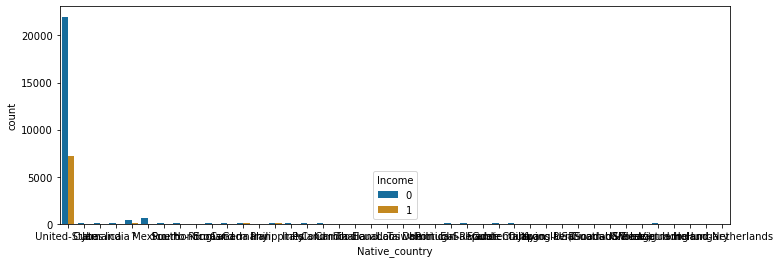

In [131]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Native_country", hue="Income", data=df, palette="colorblind")

As we saw in the counts USA is the maximum @ 91.5% people in >50k

In [132]:
#To change categorical Features into continuous features

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [135]:
for i in df.columns:
    if df[i].dtypes  == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [136]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [137]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Fnlwgt          32536 non-null  int64
 3   Education       32536 non-null  int32
 4   Education_num   32536 non-null  int64
 5   Marital_status  32536 non-null  int32
 6   Occupation      32536 non-null  int32
 7   Relationship    32536 non-null  int32
 8   Race            32536 non-null  int32
 9   Sex             32536 non-null  int32
 10  Capital_gain    32536 non-null  int64
 11  Capital_loss    32536 non-null  int64
 12  Hours_per_week  32536 non-null  int64
 13  Native_country  32536 non-null  int32
 14  Income          32536 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 3.0 MB


In [ ]:
# Visualizing the relationship between the features and the target variable

In [138]:
# Split the data into features and label

x = df.drop(columns = ['Income'])
y = df['Income']

In [140]:
x


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [141]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32536, dtype: int64

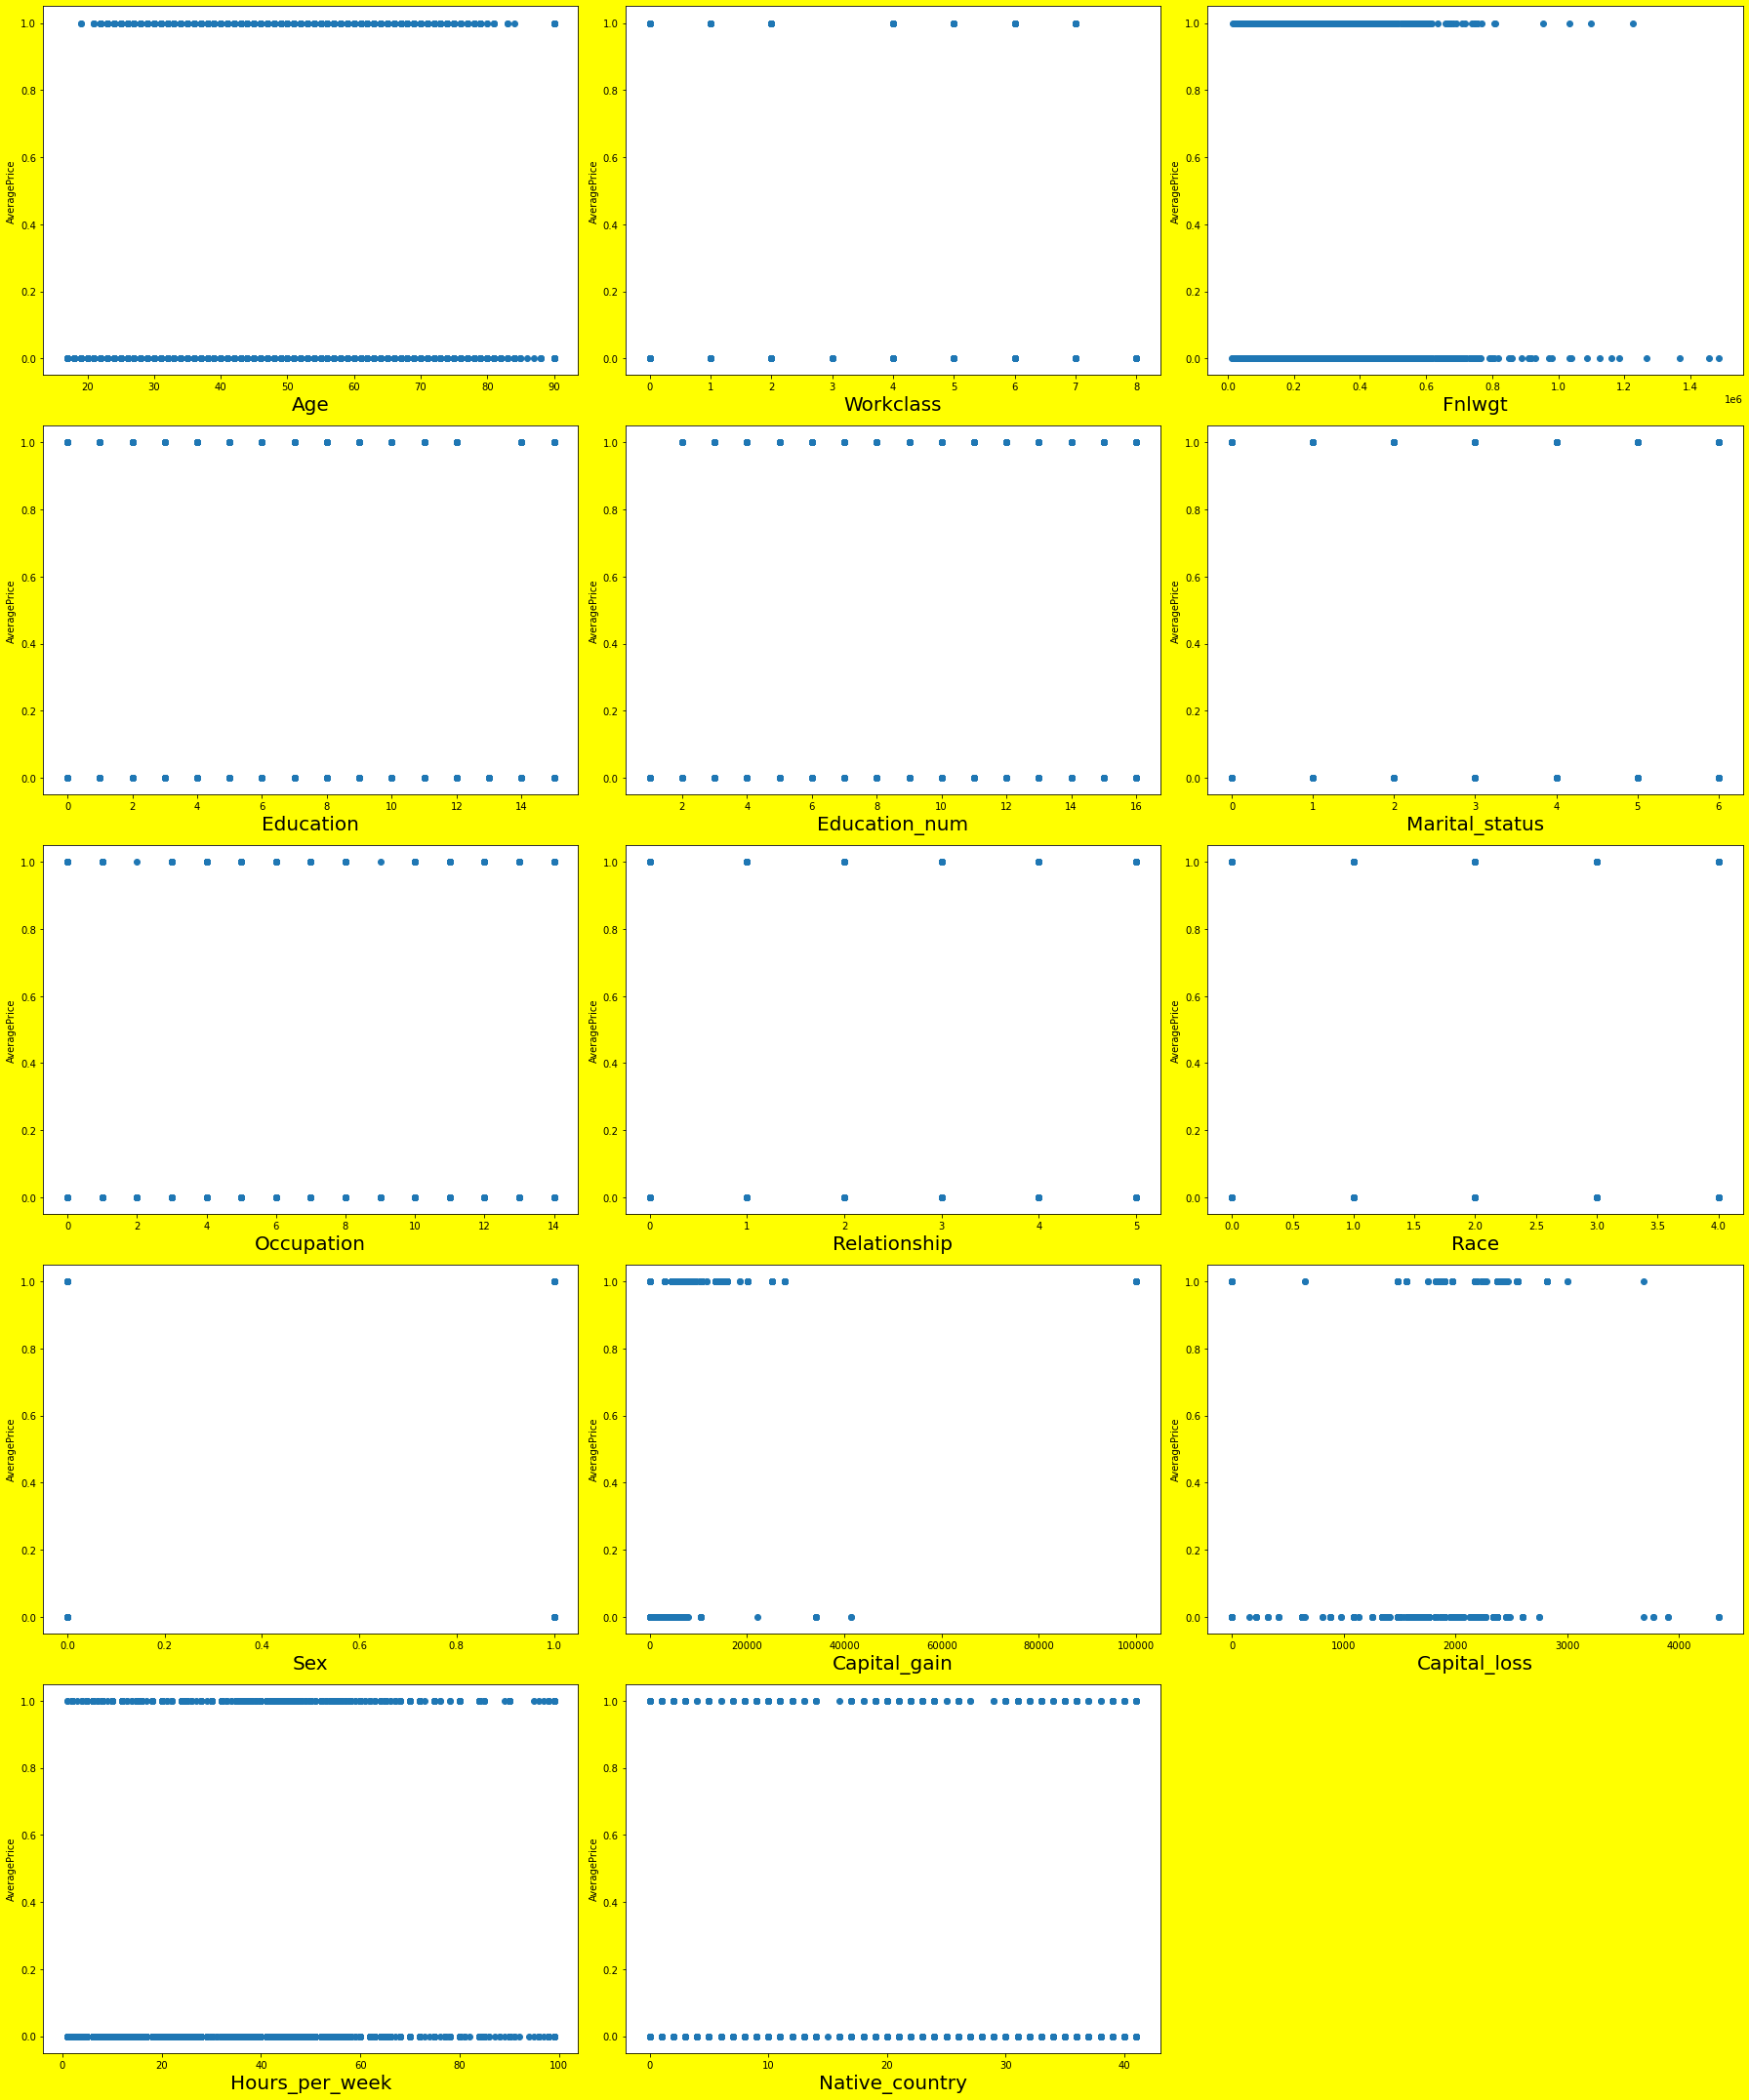

In [142]:
#Visualizing Relationship using - Scatter Plot

plt.figure(figsize =(25,30), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('AveragePrice',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


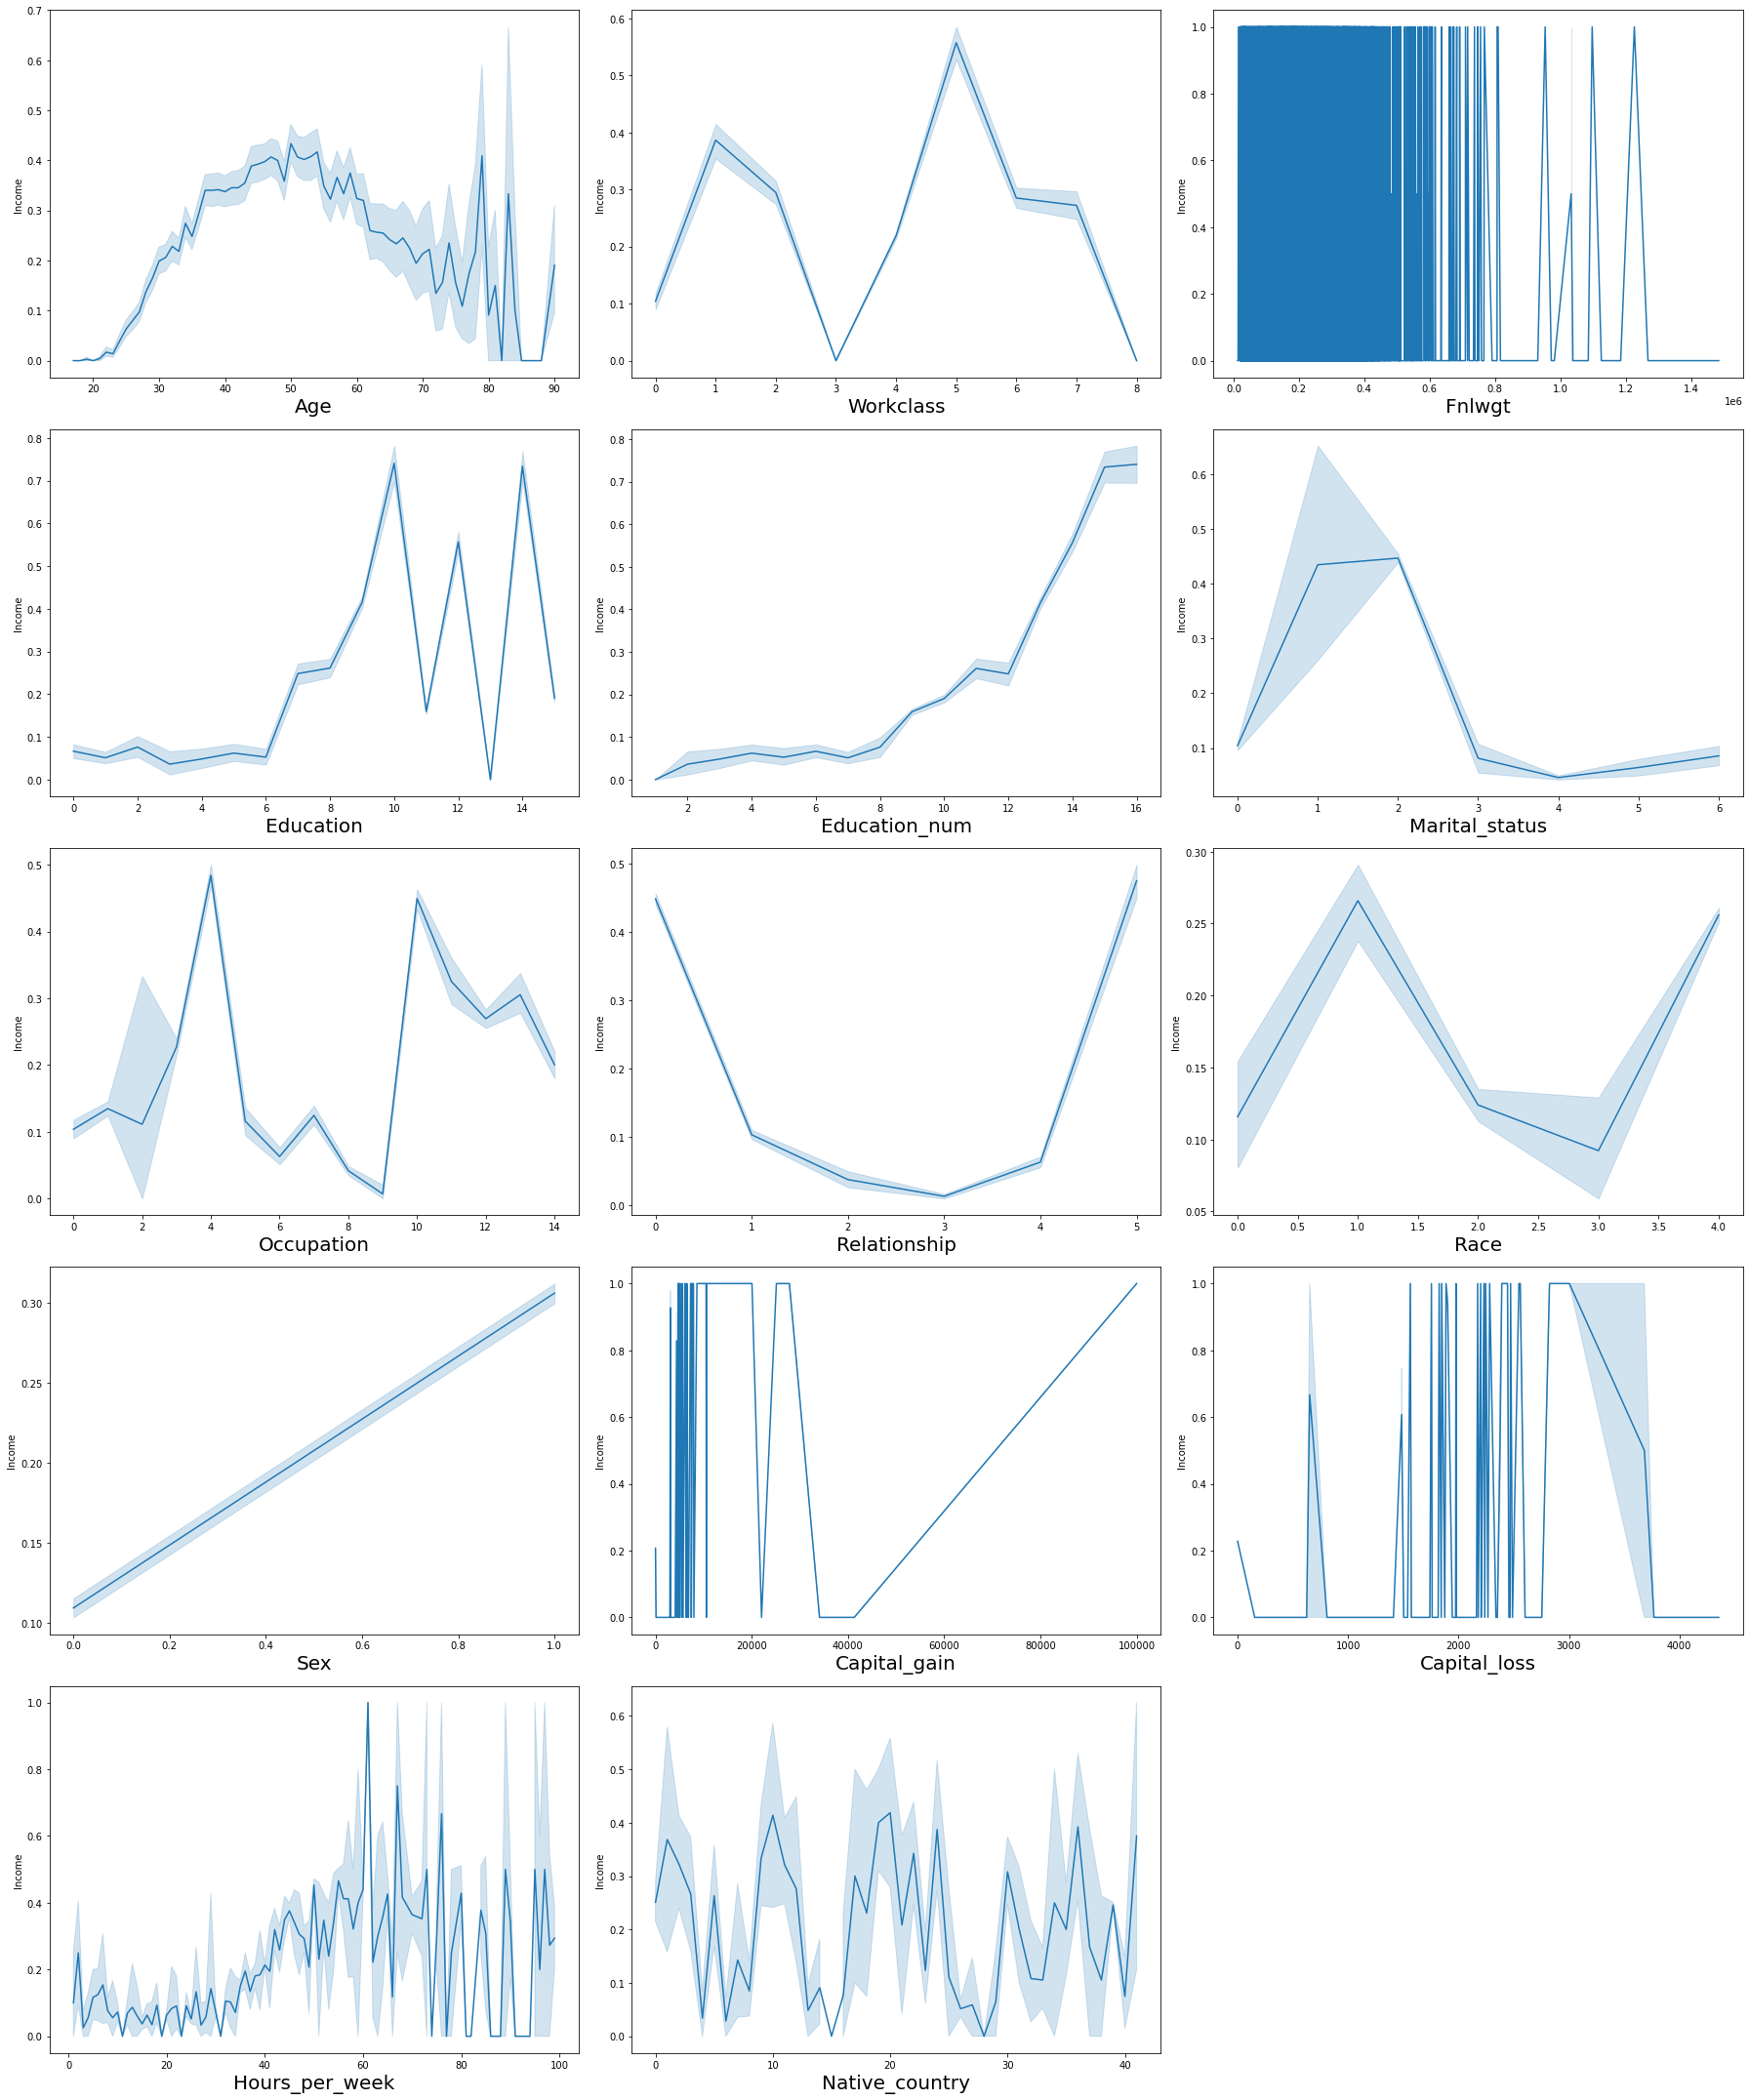

In [144]:
#Visualizing Relationship using - Line Plot

plt.figure(figsize =(25,30), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.lineplot(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Income',fontsize = 10)
    plotnumber +=1
plt.tight_layout()

As per visual observation, there is varied relationships with all the features and the label , We also did see the relationship in bar plot and histogram graph in previous section which gave us more insight in the relationship , these graphs are not showing the same , but we can see a different perspective here , seeing the pattern

### EDA

Describing the Dataset

In [145]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.868638,1.897843e+05,10.297547,10.081725,2.611384,6.573027,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.721508,0.240933
std,13.638193,1.456363,1.055563e+05,3.870195,2.571622,1.506304,4.229473,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,7.820842,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369932e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


As compare to previous describe data, there was outliers and extreme values, which is cleaned and arranged

### Data Visualize by Heat Map

<AxesSubplot:>

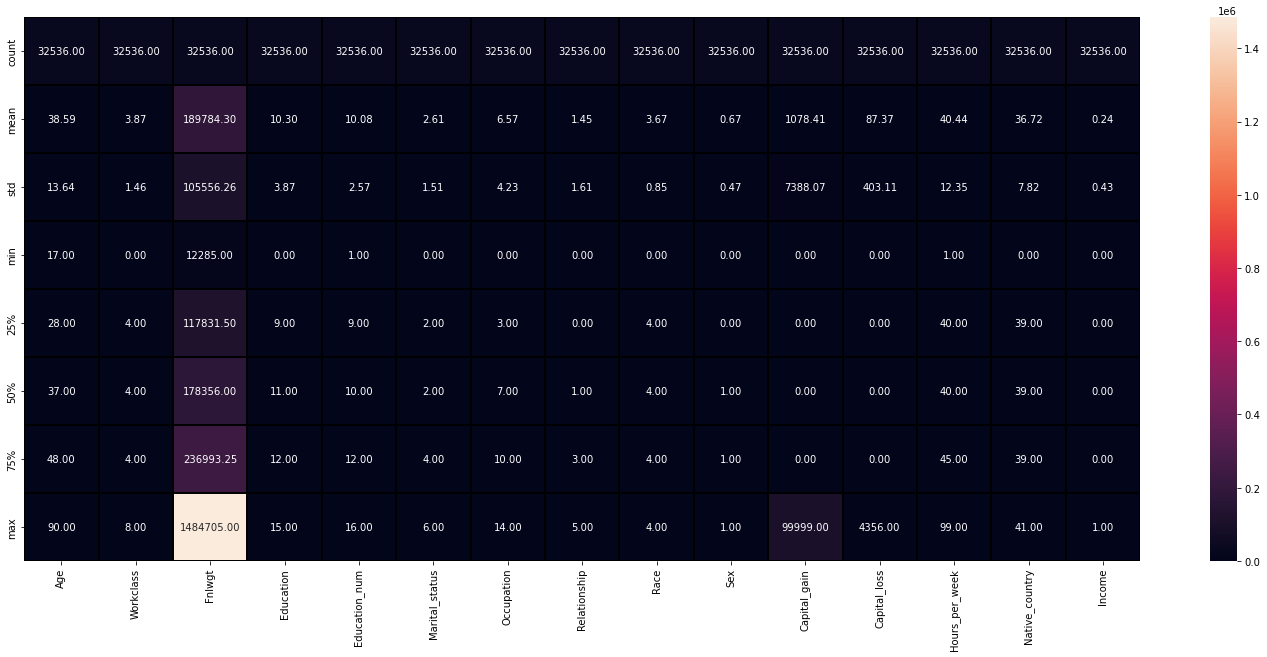

In [146]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

We see that the same here we see fnlwgt has some extreme values need to scale the data after removing skewness

In [147]:
df.skew()

Age                0.557657
Workclass         -0.751854
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.114542
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.661060
Income             1.211640
dtype: float64

In [148]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

skew=('Fnlwgt', 'Capital_gain', 'Capital_loss')

for col in skew:
    if df.skew().loc[col]> 0.55:
        df[col] = np.log1p(df[col])

In [149]:
df.skew()

Age               0.557657
Workclass        -0.751854
Fnlwgt           -0.842301
Education        -0.934180
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.114542
Relationship      0.786514
Race             -2.435283
Sex              -0.719400
Capital_gain      3.095326
Capital_loss      4.305624
Hours_per_week    0.228752
Native_country   -3.661060
Income            1.211640
dtype: float64

Observation:

The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero

In the last cell I am again checking the skewness value and there is difference between the first skewness value and second, now the skewness value of each column is near to zero.

Making the skewness value near to zero will help to get better score.

In [150]:
#Checking the correlation allfeature with target variable
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003781,-0.059818,-0.010551,0.036224,-0.266142,-0.020911,-0.263744,0.029116,0.088708,0.124182,0.051414,0.068515,-0.001524,0.234039
Workclass,0.003781,1.000000,-0.014750,0.023480,0.052099,-0.064828,0.255105,-0.090421,0.049717,0.095960,0.022524,0.010620,0.139059,-0.007697,0.051706
Fnlwgt,-0.059818,-0.014750,1.000000,-0.028680,-0.037731,0.025753,0.002962,0.010961,-0.009290,0.019652,-0.000568,-0.004151,-0.024435,-0.059800,-0.001480
Education,-0.010551,0.023480,-0.028680,1.000000,0.359105,-0.038413,-0.021249,-0.011060,0.014307,-0.027426,0.025053,0.016704,0.055991,0.063874,0.079361
Education_num,0.036224,0.052099,-0.037731,0.359105,1.000000,-0.069196,0.109804,-0.094424,0.031998,0.012181,0.129029,0.077118,0.148426,0.050127,0.335299
Marital_status,-0.266142,-0.064828,0.025753,-0.038413,-0.069196,1.000000,-0.009778,0.185542,-0.067942,-0.129425,-0.066626,-0.035900,-0.190433,-0.023414,-0.199187
Occupation,-0.020911,0.255105,0.002962,-0.021249,0.109804,-0.009778,1.000000,-0.075600,0.006811,0.080532,0.019966,0.018814,0.080502,-0.012394,0.075398
Relationship,-0.263744,-0.090421,0.010961,-0.011060,-0.094424,0.185542,-0.075600,1.000000,-0.116048,-0.582593,-0.083439,-0.057492,-0.248876,-0.005634,-0.250955
Race,0.029116,0.049717,-0.009290,0.014307,0.031998,-0.067942,0.006811,-0.116048,1.000000,0.087464,0.024077,0.018373,0.041921,0.137847,0.071855
Sex,0.088708,0.095960,0.019652,-0.027426,0.012181,-0.129425,0.080532,-0.582593,0.087464,1.000000,0.068965,0.042593,0.229190,-0.008262,0.215984


We see that Education_num has the highest correlation with the target variable having a score of 0.34 which is the highest and Capital_gain is the 2nd Highest

In [ ]:
Data Visualization with Heat Map of features and target variable

<AxesSubplot:>

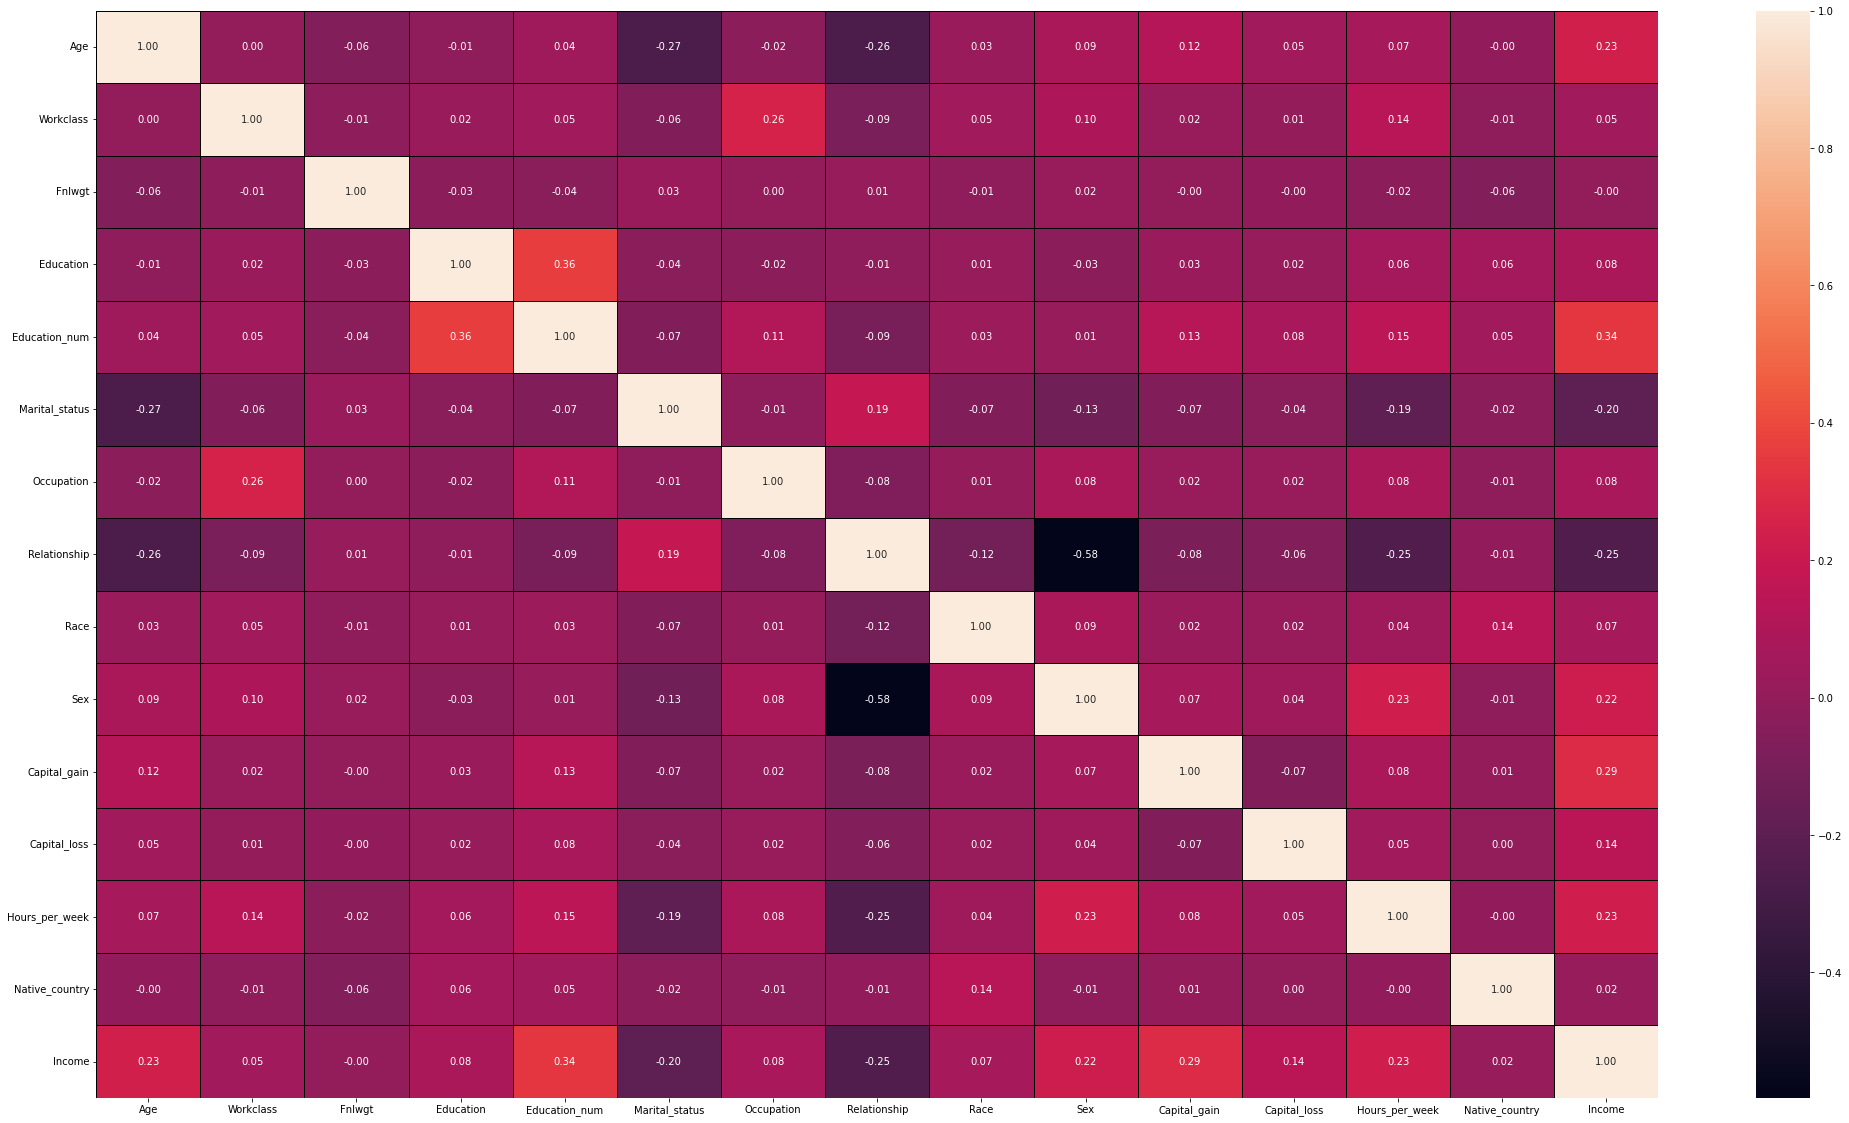

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

Observations from the heatmap

we see that there isnt multicollinearity problem in the data, some correlation between education and education_num is seen , but apart from that the rest of the features are not having high correaltion

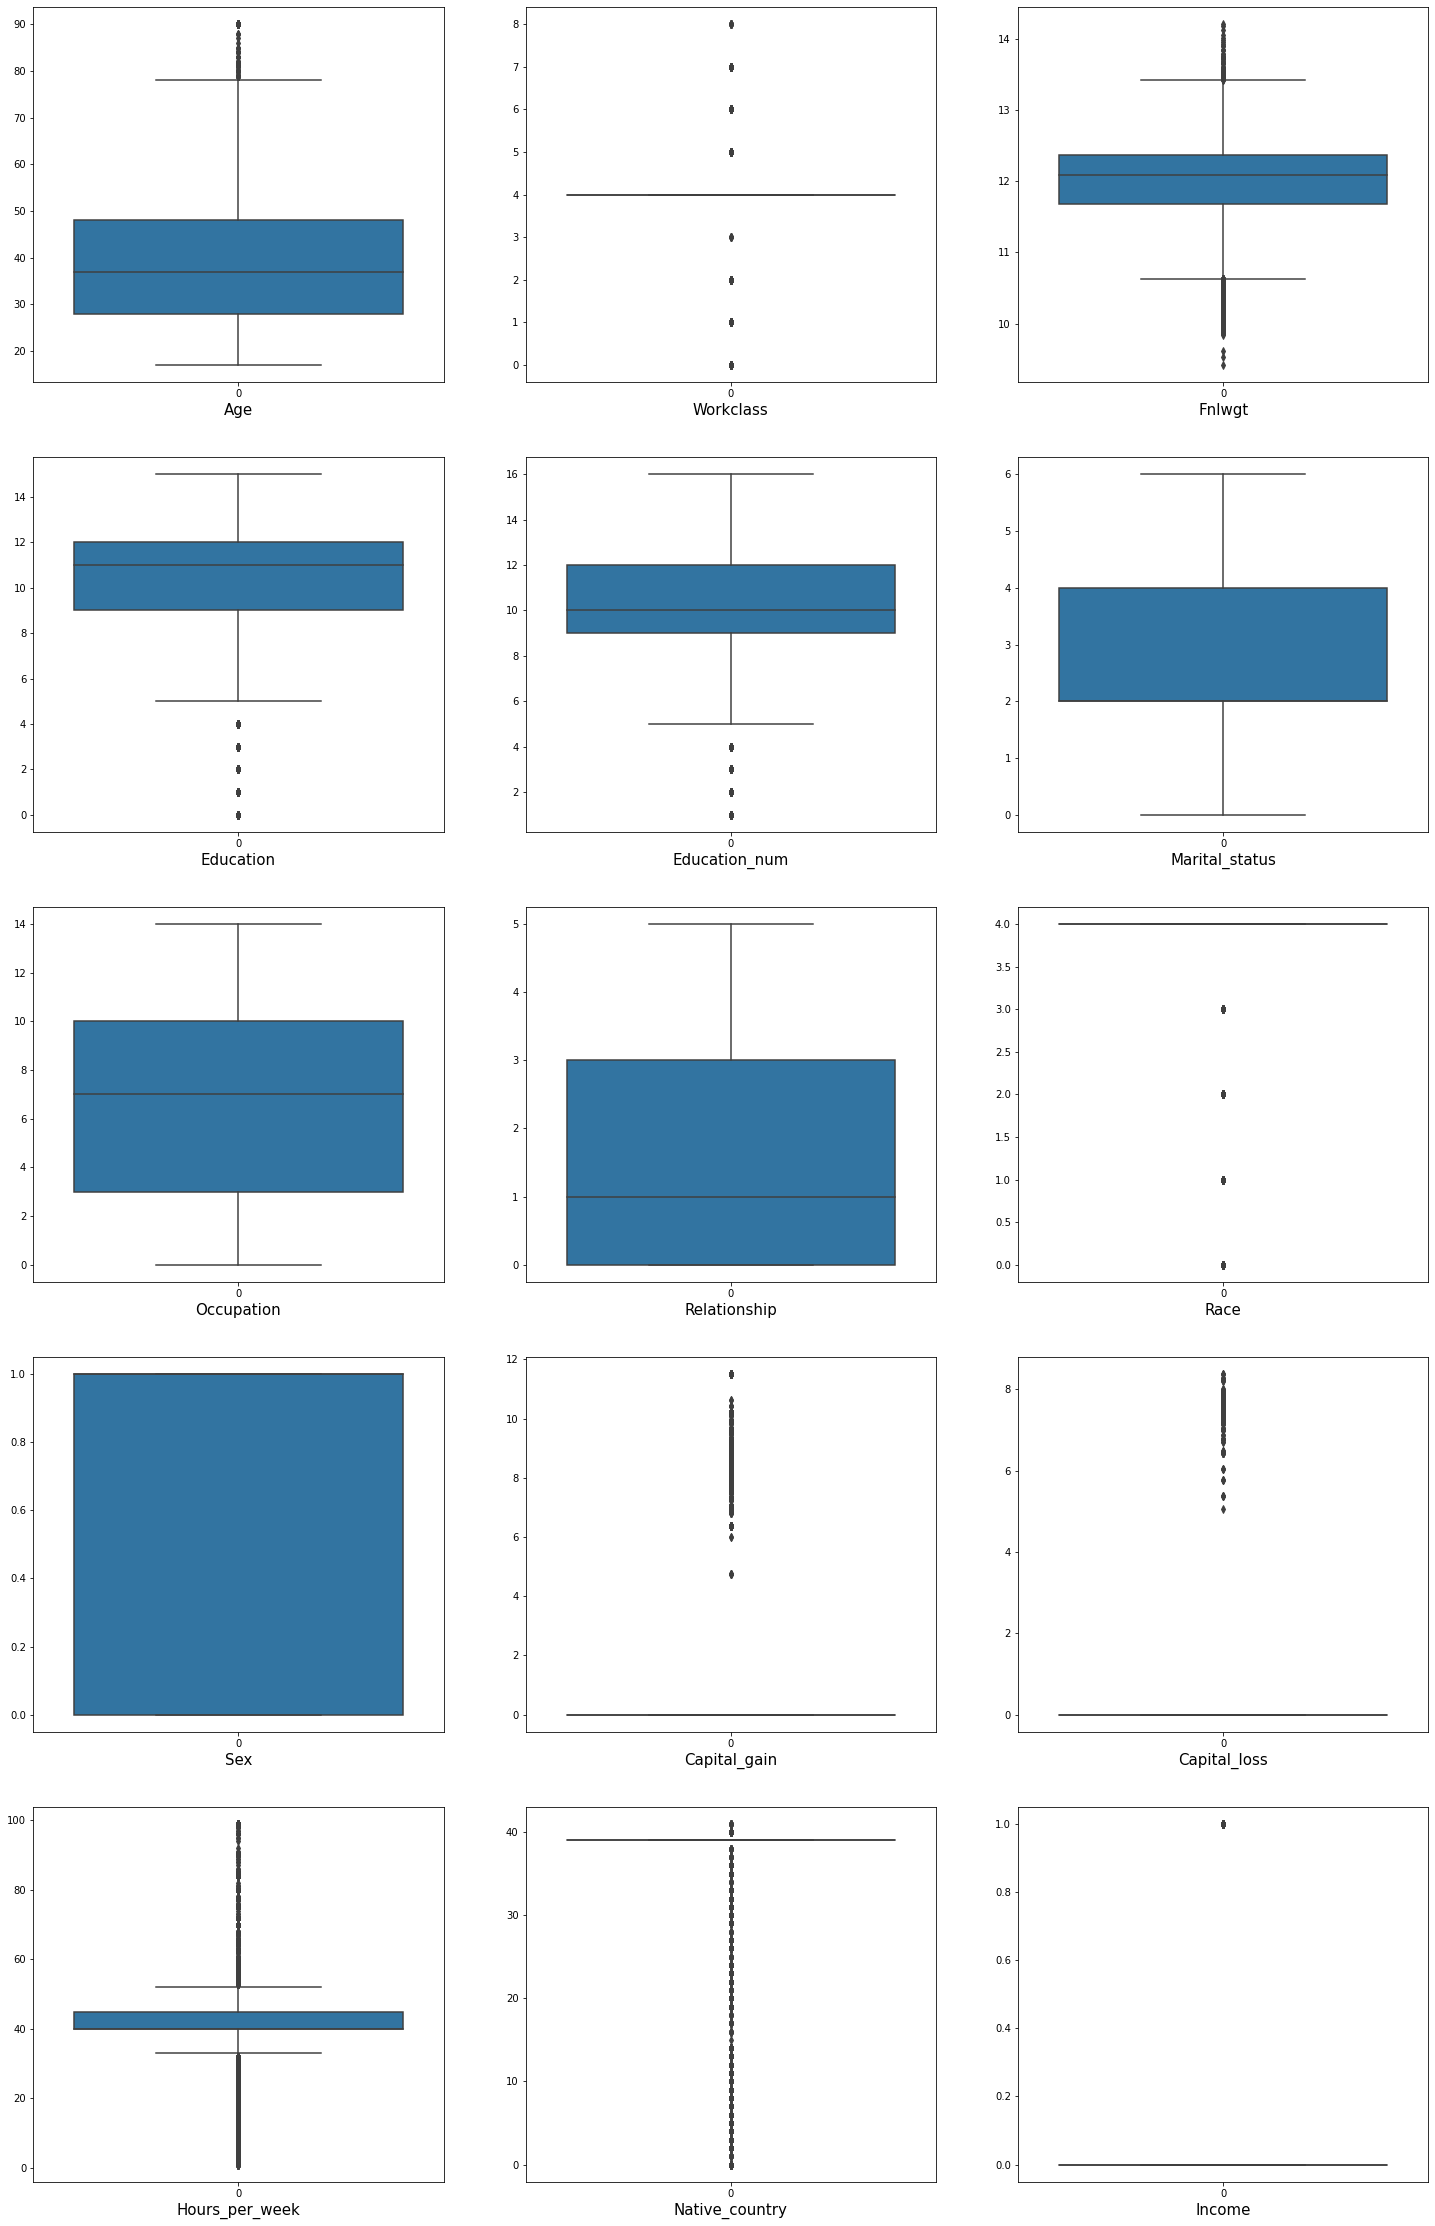

In [153]:
#Checking for Outliers

#Lets visualize the data
plt.figure(figsize =(25,40))
graph = 1

for column in df:
    if graph <=15: # as there are 9 columns in data
        plt.subplot(5,3,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

We see that all the numerical columns such as Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week have outliers , so we will use zscore to treat them and then scale the data

### Using SelectKBest Feature Selection Method - Target - Income

Select KBest use f_classif function to find the best features, where f_classif uses Anova Test

In [154]:
# Splitting the data into features and label

X = df.drop(columns = ['Income'])
y = df['Income']

In [157]:
from sklearn.feature_selection import SelectKBest,f_classif

In [158]:
best_features = SelectKBest(score_func = f_classif, k=14)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)


#concatenate dataframes

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_name', 'Score']   #name output columns

print(feature_scores.nlargest(14,'Score'))  #Print Best 4 features

      Feature_name        Score
4    Education_num  4120.959861
10    Capital_gain  2976.906935
7     Relationship  2186.644675
0              Age  1885.286977
12  Hours_per_week  1811.486632
9              Sex  1591.944711
5   Marital_status  1344.129315
11    Capital_loss   661.021522
3        Education   206.203986
6       Occupation   186.010145
8             Race   168.848540
1        Workclass    87.213326
13  Native_country     7.943124
2           Fnlwgt     0.071301


features Education_num as well as Capital_gain is the best as the score they have are greater than 2900 approx which is really highmwe will not remove any columns as the data shows that most of the column is good for prediction

### Variance Inflation Factor

Checking the multi-collinearity whether there were and feature depend on other

In [159]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [160]:
X_scaled = mms.fit_transform(X)

In [161]:
X_scaled.shape

(32536, 14)

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#chck Values
vif

,vif,Features
0,3.711330,Age
1,8.477595,Workclass
2,14.224085,Fnlwgt
3,9.180463,Education
4,15.511091,Education_num
5,4.090827,Marital_status
6,3.712076,Occupation
7,2.702428,Relationship
8,17.712713,Race
9,4.487899,Sex


We see the same columns whichwe have seen the outliers have now shown that they have a very high VIF score which we need to treat before we can go into model building

### Principal Component Analysis (PCA)

It is a dimension reduction technique andt is mainly used if there are too many features and no correlation with the target

but its the final analysis we are going to do to chcek for multicollinearity problem

In [163]:
from sklearn.decomposition import PCA

pca = PCA()

In [164]:
pca.fit_transform(X_scaled) #To scale the data with PCA so we can plot the graph to see whats the coverage 

array([[-0.42615104,  0.15422268, -0.09707448, ..., -0.20268754,
         0.06558483, -0.36700784],
       [-0.36857478,  0.07772353, -0.16293015, ...,  0.08577566,
        -0.05631456, -0.03786395],
       [-0.41869094,  0.11330811,  0.40816515, ..., -0.01908969,
        -0.0943298 , -0.00510614],
       ...,
       [ 0.89093079,  0.32702405,  0.15173509, ..., -0.06071664,
        -0.02600939,  0.1206213 ],
       [-0.05461119,  0.42036056,  0.32361893, ...,  0.03546461,
        -0.04277522, -0.16906722],
       [ 0.86282061,  0.07094297, -0.2037083 , ...,  0.1589016 ,
        -0.12759858,  0.04516601]])

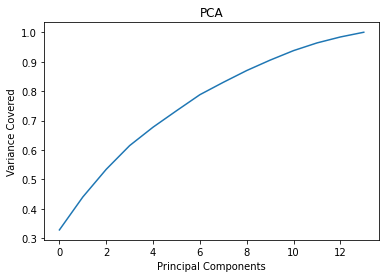

In [165]:
# lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

We see that in order to cover 95% - 100% of the data we need to have only have 10 features and we can remove the rest , We will use the Kbest to decide which features are the best and see if we should remove any feautes , But at this pont we will move ahead as all the columns constitute to making the model better

### Using Zscore to deal with the outliers in the data

In [166]:
df.shape

(32536, 15)

In [167]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     7,     8, ..., 32526, 32528, 32535], dtype=int64),
 array([13, 10, 10, ...,  8,  8, 10], dtype=int64))

In [168]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,11.330348,9,13,2,4,0,4,1,0.0,0.0,13,39,0
1,38,4,12.281398,11,9,0,6,1,4,1,0.0,0.0,40,39,0
2,53,4,12.366157,1,7,2,6,0,2,1,0.0,0.0,40,39,0
4,37,4,12.558780,12,14,2,4,5,4,0,0.0,0.0,40,39,0
5,49,4,11.984103,6,5,3,8,1,2,0,0.0,0.0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,4,12.644821,15,10,4,11,1,4,1,0.0,0.0,40,39,0
32555,27,4,12.458010,7,12,2,13,5,4,0,0.0,0.0,38,39,0
32556,40,4,11.947140,11,9,2,7,0,4,1,0.0,0.0,40,39,1
32557,58,4,11.931050,11,9,6,1,4,4,0,0.0,0.0,40,39,0


In [169]:
df_new_z.shape

(25836, 15)

In [171]:
# Percentage of Data loss

Data_loss = ((32536-25836)/32538)*100

In [172]:
Data_loss

20.591308623762984

We have lost 20.59% of the data as we have to remove the skewness which occured due to outliers so that the model is not biased towards it

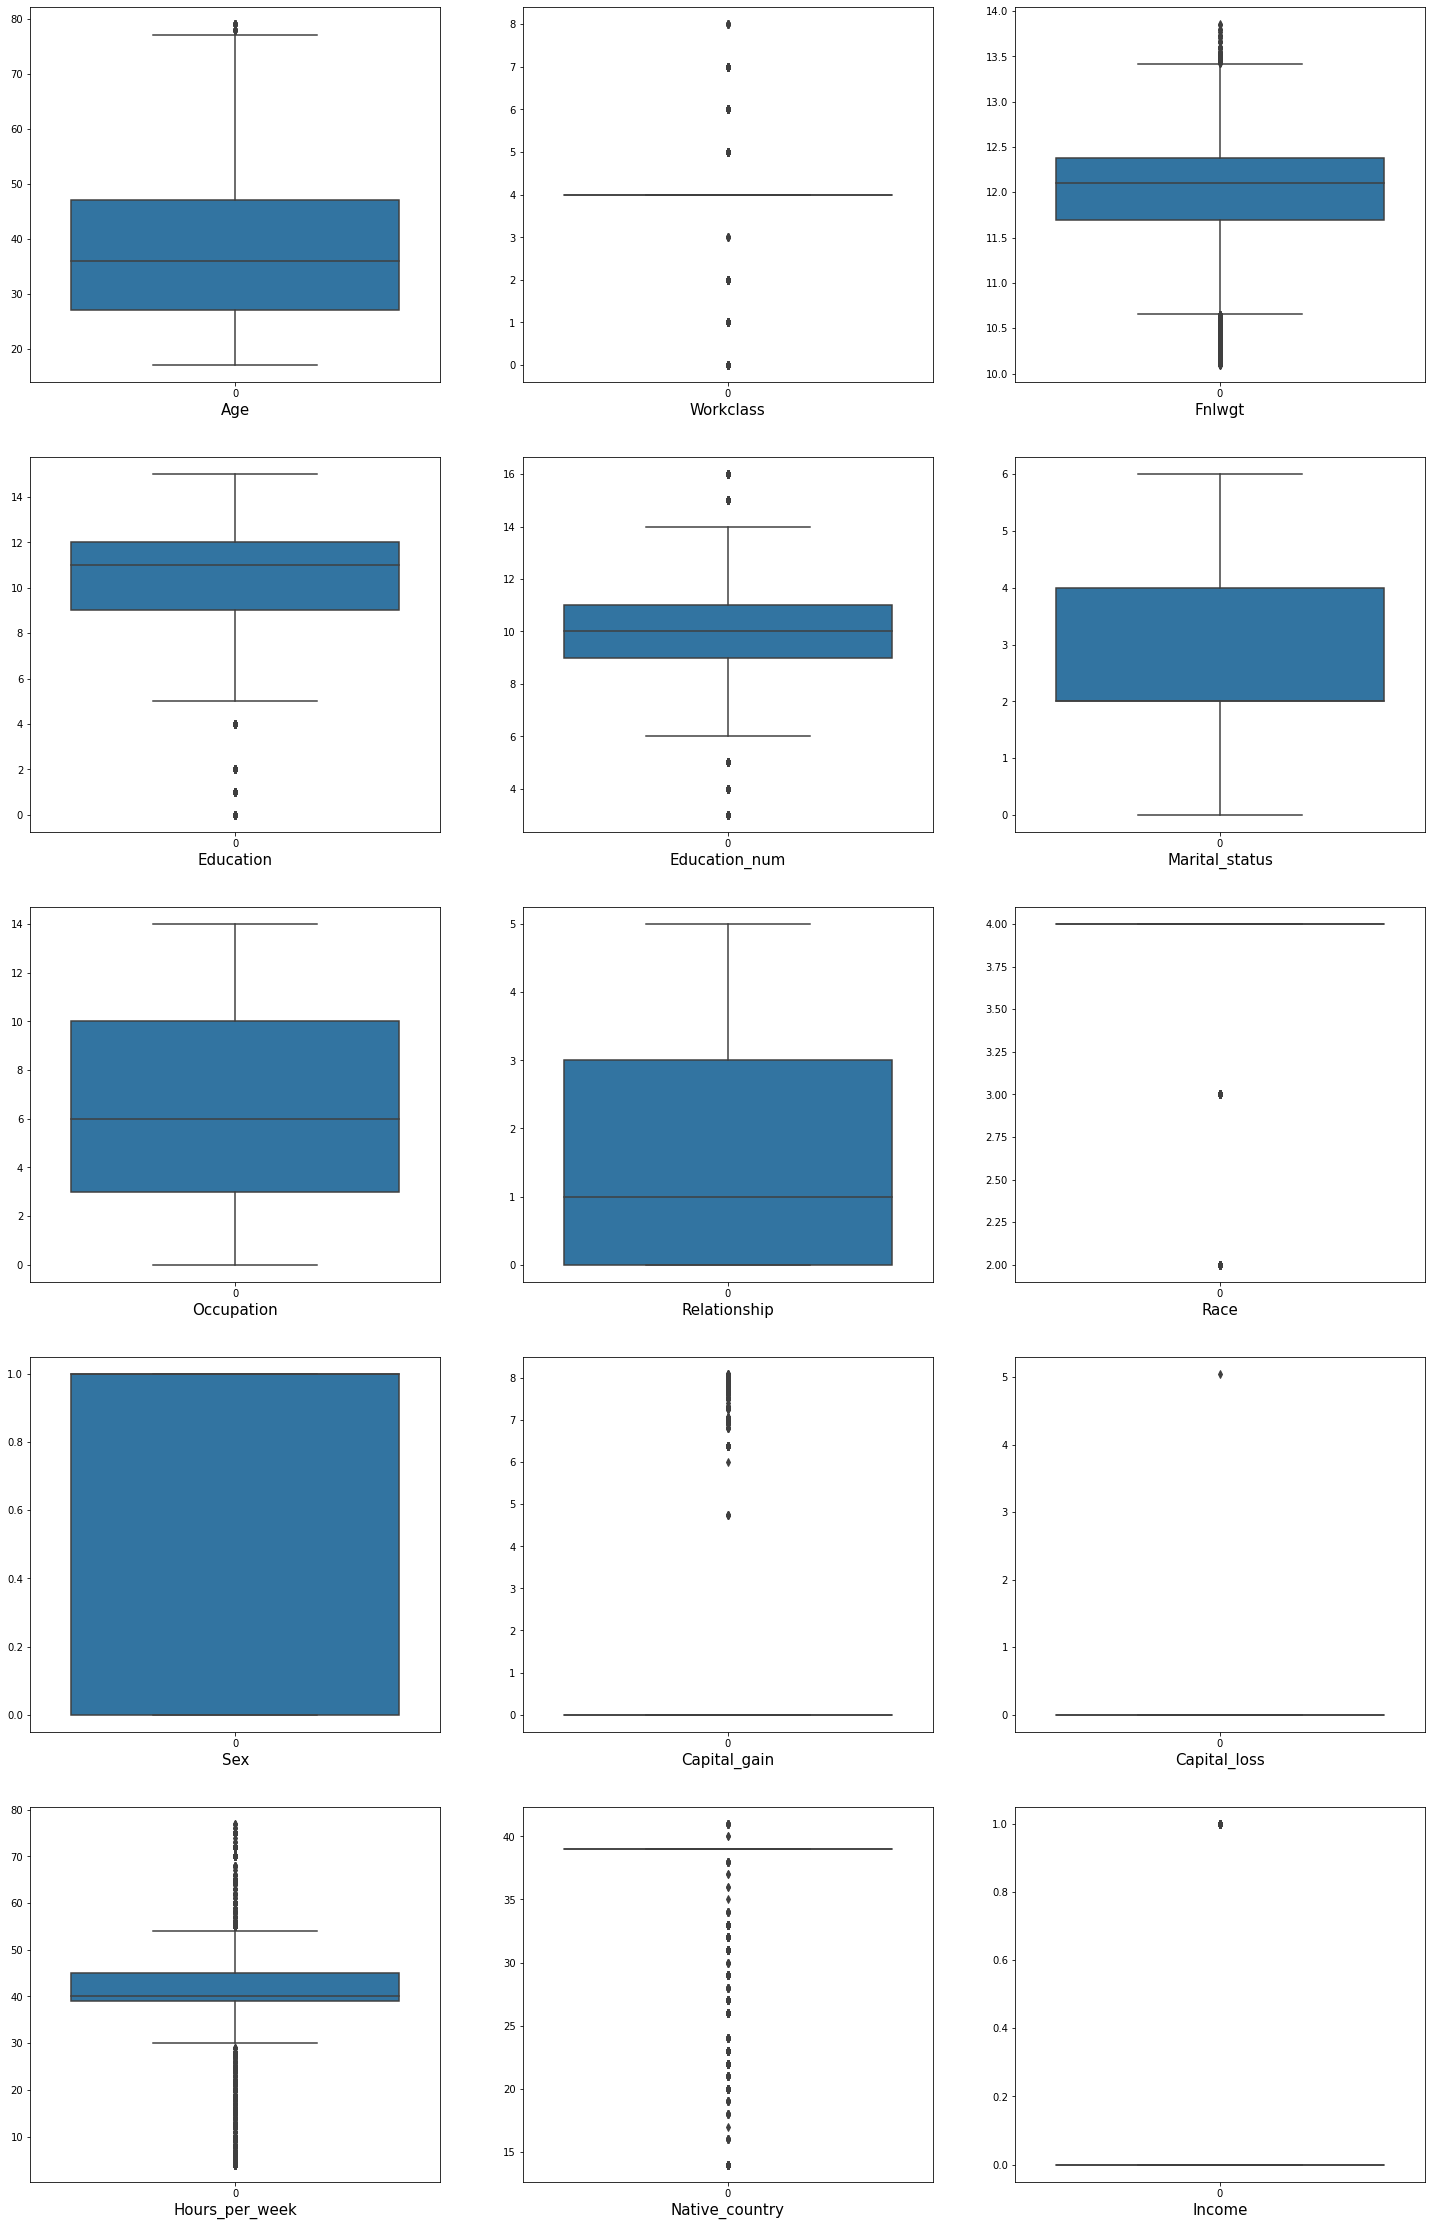

In [173]:
#Lets visualize the data
plt.figure(figsize =(25,40))
graph = 1

for column in df_new_z:
    if graph <=15: # as there are 9 columns in data
        plt.subplot(5,3,graph)
        ax=sns.boxplot(data=df_new_z[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

After treating with Zscore we see much better data , the only columns we see there is some outliers are the categorical columns like hours_per_week as well as education_num and mainly Native _Country which we cannot do anything for as we need all the data

### Choosing the Best Model After Testing the Best Model

### Sampling Technique

In [174]:
y.value_counts()

0    24697
1     7839
Name: Income, dtype: int64

As we see the dataset is imbalanced and we need to treat this or the model will give a good score but will be biased

In [190]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 76)

In [191]:
from collections import Counter
Counter(y_train)

Counter({0: 18502, 1: 5900})

In [192]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [196]:
ds = NearMiss()

ove_smp = SMOTE()

X_train_ns,y_train_ns= ds.fit_resample(X_train,y_train) # using resample as the sample did not work

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 18502, 1: 5900})
The number of classes after fit Counter({0: 5900, 1: 5900})


In [197]:
from sklearn.preprocessing import StandardScaler # scale the data as we have very high values in fnlwgt

scaler = StandardScaler()
X_train_ns = pd.DataFrame(scaler.fit_transform(X_train_ns), columns = X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_ns

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.122345,-0.000467,0.009590,0.038857,-0.910588,-0.111368,-0.918106,-0.562404,0.286838,0.504234,-0.366370,-0.241993,-0.461687,0.187220
1,0.216801,-0.000467,0.149959,0.038857,-0.910588,-0.111368,-0.918106,-0.562404,0.286838,0.504234,-0.366370,-0.241993,-0.461687,0.187220
2,0.216801,-0.000467,0.226294,0.038857,-0.910588,-0.111368,-0.918106,-0.562404,0.286838,0.504234,-0.366370,-0.241993,-0.461687,0.187220
3,0.216801,-0.000467,0.090598,0.038857,-0.910588,-0.111368,-0.918106,-0.562404,0.286838,0.504234,-0.366370,-0.241993,-0.461687,0.187220
4,-0.633304,-0.000467,0.534752,0.038857,-0.910588,-0.111368,-0.918106,-0.562404,0.286838,0.504234,-0.366370,-0.241993,-0.461687,0.187220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11795,-0.916673,-0.000467,1.009120,0.396786,1.339472,-0.111368,-0.676838,-0.562404,-2.854401,0.504234,-0.366370,4.141085,-0.461687,0.187220
11796,2.105923,2.359583,0.333956,-0.319073,2.239496,1.638486,0.770769,0.134913,0.286838,-1.983207,2.457048,-0.241993,-0.461687,0.187220
11797,0.027889,-0.000467,-0.237565,0.038857,-0.910588,-0.111368,-0.676838,-0.562404,0.286838,0.504234,-0.366370,-0.241993,-1.025302,0.187220
11798,1.633643,-0.000467,0.713170,1.470574,-0.460576,-0.111368,1.494572,-0.562404,0.286838,0.504234,-0.366370,-0.241993,-0.461687,0.187220


In [ ]:
Logistic Regression

In [198]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [199]:
scores=[]
for i in range(0,100):
    X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = i)
    lr.fit(X_train_ns,y_train_ns)
    pred_train = lr.predict(X_train_ns)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
    print(f"At random state {i},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
    print('\n')
    scores.append(accuracy_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.8148512417014999
At random state 0,the Testing accuracy is :-0.8075977378903368


At random state 1,the training accuracy is :-0.8155479059093517
At random state 1,the Testing accuracy is :-0.8052618637816572


At random state 2,the training accuracy is :-0.813498893533317
At random state 2,the Testing accuracy is :-0.8127612490779444


At random state 3,the training accuracy is :-0.8123924268502581
At random state 3,the Testing accuracy is :-0.812023604622572


At random state 4,the training accuracy is :-0.8114498811572822
At random state 4,the Testing accuracy is :-0.8162035898696828


At random state 5,the training accuracy is :-0.8134579132857962
At random state 5,the Testing accuracy is :-0.8119006638800098


At random state 6,the training accuracy is :-0.8127612490779444
At random state 6,the Testing accuracy is :-0.8139906565035653


At random state 7,the training accuracy is :-0.8123514466027375
At random state 7,the Testing accur

In [200]:
np.argmax(scores)

62

In [201]:
scores[np.argmax(scores)]

0.822350626997787

### Great!!  we are getting  greater than 80%

At random state 98,the training accuracy is :-0.813498893533317

At random state 98,the Testing accuracy is :-0.8117777231374478
    
the training score and Testing score are really close to each other here
both the train and test score are really good but we will test more an also th cv score to see if its consistent

In [202]:
#Train Test Split

X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = 98) 

# as the best random state we have chosen is 98

In [203]:
#Write one function and call as many times to check accuracy_score of different models

def metric_score(clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        
        print("\n===============================Train Result=============================")
        
        print(f"Accuracy score : {accuracy_score(y_train_ns,y_pred) * 100: .2f}%")
        
    elif train == False:
        pred = clf.predict(X_test)
        
        print("\n===============================Test Result===============================")
        print(f"Accuracy Scorre : {accuracy_score(y_test,pred) * 100: .2f}%")
        
        
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) ##Model Confidence /Accurancy
        

In [204]:
#Call the function and pass dataset to check the train score and the test score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  81.35%

===============================Test Result===============================
Accuracy Scorre :  81.31%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.94      0.88      6159
           1       0.69      0.43      0.53      1975

    accuracy                           0.81      8134
   macro avg       0.76      0.68      0.70      8134
weighted avg       0.80      0.81      0.80      8134



We see that this model is having a pretty good score in Logistic regression , we see the train score as 81.39% and the test score as 81.33%

In [205]:
print(confusion_matrix(y_test,pred_test))  

[[5201  958]
 [1660  315]]


We see that the type 1 and 2 error is pretty high , and we need to see other models , but before that we will check cv score

### Cross-Validation of the model

In [206]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

At cross fold2 the cv score is 0.8130993361199902 and accuracy score for training is 0.6824440619621343and the accuracy for testing is 0.6781411359724613


At cross fold3 the cv score is 0.8135297889525122 and accuracy score for training is 0.6824440619621343and the accuracy for testing is 0.6781411359724613


At cross fold4 the cv score is 0.8125153675928202 and accuracy score for training is 0.6824440619621343and the accuracy for testing is 0.6781411359724613


At cross fold5 the cv score is 0.812454026862849 and accuracy score for training is 0.6824440619621343and the accuracy for testing is 0.6781411359724613


At cross fold6 the cv score is 0.8134376503718072 and accuracy score for training is 0.6824440619621343and the accuracy for testing is 0.6781411359724613


At cross fold7 the cv score is 0.8129763953774282 and accuracy score for training is 0.6824440619621343and the accuracy for testing is 0.6781411359724613


At cross fold8 the cv score is 0.8130993361199902 and accuracy sc

We see that the model is overfitting the data as we see the cv score of 81% approx is giving a test score of 67% approx so we need to check other modelsa as well

### Decision Tree Classifier

In [207]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = 98) #as we have seen a good score on 98th state
dt.fit(X_train_ns,y_train_ns)
pred_train = dt.predict(X_train_ns)
pred_test = dt.predict(X_test)
print(f"At random state {98},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
print(f"At random state {98},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
print('\n')


At random state 98,the training accuracy is :-1.0
At random state 98,the Testing accuracy is :-0.809318908286206




In [208]:
#Call the function and pass dataset to check the train score and the test score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  80.93%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      6159
           1       0.60      0.63      0.61      1975

    accuracy                           0.81      8134
   macro avg       0.74      0.75      0.74      8134
weighted avg       0.81      0.81      0.81      8134



In [209]:
print(confusion_matrix(y_test,pred_test)) 

[[5348  811]
 [ 740 1235]]


### Observations:
    
- We see that the training score is boosted all the way to 100% which is the highest  but the testing score is fallen short  @ 81.13% which is lesser than the logistic model but a slight decimal only  , also we see that the F1 score is the same as test score for accuracy and precision is 74% for 0 and only 81% for 1 which is same than the last model 

- the model is not performing as good as Logistic regression but we cant use this model moving to check the cv score

In [210]:
#Cross validation of the model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dt,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

At cross fold2 the cv score is 0.8065834767641996 and accuracy score for training is 1.0and the accuracy for testing is 0.809318908286206


At cross fold3 the cv score is 0.8121157880982143 and accuracy score for training is 1.0and the accuracy for testing is 0.809318908286206


At cross fold4 the cv score is 0.8095340545856897 and accuracy score for training is 1.0and the accuracy for testing is 0.809318908286206


At cross fold5 the cv score is 0.8069523964972145 and accuracy score for training is 1.0and the accuracy for testing is 0.809318908286206


At cross fold6 the cv score is 0.8094419590643374 and accuracy score for training is 1.0and the accuracy for testing is 0.809318908286206


At cross fold7 the cv score is 0.8111630194246373 and accuracy score for training is 1.0and the accuracy for testing is 0.809318908286206


At cross fold8 the cv score is 0.8101794934841406 and accuracy score for training is 1.0and the accuracy for testing is 0.809318908286206


At cross fold9 the c

We see really good cv score at state 3 where the cv score is 0.8137447661649558 and accuracy score for training is 1.0and the accuracy for testing is 0.8112859601671994 so the closest state where test and cv score is present

### KNN Classifier

In [211]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train_ns,y_train_ns)
knn.score(X_train_ns,y_train_ns)
pred_decision =knn.predict(X_test)

knns = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',knns*100)

knnscore = cross_val_score(knn,X,y,cv=3)
knnc =knnscore.mean()
print('Cross Val Score :',knnc*100)
print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 80.72289156626506
Cross Val Score : 80.54463227036935
[[5438  721]
 [ 847 1128]]


In [212]:
#Call the function and pass dataset to check the train score and the test score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  86.37%

===============================Test Result===============================
Accuracy Scorre :  80.72%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      6159
           1       0.61      0.57      0.59      1975

    accuracy                           0.81      8134
   macro avg       0.74      0.73      0.73      8134
weighted avg       0.80      0.81      0.81      8134



Observations from the KNN Classifier :-
- We see that the training score is lesser than Decision tree @ 86.37%   but the testing score good but slightly lesser than the logistic regression as well as Decision tree

- we see that the F1 score is the same  where accuracy for 0 is 987% and for 1 is 59% which is bad 

- the CV score is good though and very similar to the test accuracy @ 80.72% , so overall the model is ok , but we need to improve the f1 score and precision

- we see the confusion matrix where the typ 1 and typ 2 error is horribly very high and we nned to test other models 

### Random Forest Classifier

In [213]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=8)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)
print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 85.80034423407918
Cross Val Score : 85.78497664125891
[[5746  413]
 [ 742 1233]]


In [214]:
#Call the function and pass dataset to check the train score and the test score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  85.80%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6159
           1       0.75      0.62      0.68      1975

    accuracy                           0.86      8134
   macro avg       0.82      0.78      0.79      8134
weighted avg       0.85      0.86      0.85      8134



Observations from the Random Forest Classifier :-
    
- We see that like the decision tree the train score is at the max at 100% and we have test score much better at 85.91% , the F1 score is at 86% and precisiion @ 81% which is a good model and the best till now , we have imbalance dataset and we treated so we have a little higher Cv score of 85.70% approx so we are getting a good cv score as well which is on par with the test sore which is what we need the model to do 

- the model has higher errors in the confusion matrix as all the models 

### XgBoost

In [215]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb.fit(X_train_ns,y_train_ns)
xgb.score(X_train_ns,y_train_ns)
pred_decision =xgb.predict(X_test)

xgbs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=3)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)
print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 87.3002212933366
Cross Val Score : 86.73777407787996
[[5791  368]
 [ 665 1310]]


In [216]:
#Call the function and pass dataset to check the train score and the test score

metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  90.98%

===============================Test Result===============================
Accuracy Scorre :  87.30%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      6159
           1       0.78      0.66      0.72      1975

    accuracy                           0.87      8134
   macro avg       0.84      0.80      0.82      8134
weighted avg       0.87      0.87      0.87      8134



Observations from the XGboost Classifier :-
    
- We see that the training score is slightly the random forest and the decision tree at 91% and we see a higher accuracy score for test at 87.30 % which is only slightly better than the random forest ,we see the F1 score to be higher too @ 87% again higher to rf  the precision score is 84% which is more than the Random forest 
The CV score is @ 86.76 which is higher than the random forest whcih had a closer cv to the test score @ 87.30% approx so overall really good scores from this model aand its the best till now considering the scores only

- Confusion matrix errors are 10 and 47 which is decent but we need to avoid this much of error to have a better model but better than the earlier models for sure

### SVC

In [217]:
from sklearn.svm import SVC

svc= SVC()

svc.fit(X_train_ns,y_train_ns)
svc.score(X_train_ns,y_train_ns)
pred_decision =svc.predict(X_test)

svcs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',svcs*100)

svcscore = cross_val_score(svc,X,y,cv=3)
svcc =svcscore.mean()
print('Cross Val Score :',svcc*100)
print(confusion_matrix(y_test,pred_decision))

Accuracy Score : 82.06294566019179
Cross Val Score : 81.78326148203182
[[5928  231]
 [1228  747]]


In [218]:
#Call the function and pass dataset to check the train score and the test score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  81.89%

===============================Test Result===============================
Accuracy Scorre :  82.06%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      6159
           1       0.76      0.38      0.51      1975

    accuracy                           0.82      8134
   macro avg       0.80      0.67      0.70      8134
weighted avg       0.81      0.82      0.80      8134



Observations from the SVC Classifier :-
    
- We see that this model is also performimg like the Logistic Regression model where the train score is 82% and the test is 82.06% F1 score is less and precioson is 80% whic is less , the cv score is also on par with the logistic regression which is 81-82%% approx , so we see good score , but the best still according to score is XGB Classifier as off now
the confusionmatrix is giving high error but much much better than the rest of the models we tested

### As per analyse that XGB Classifier is the best algorithm for this project as it has the highest scores and least difference between the Cross val score and accuracy but we need to check roc auc to finalize the decision

### Let's check ROC AUC Curve for the fitted Model

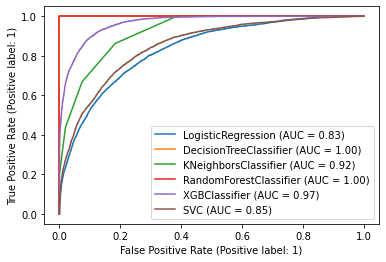

In [219]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt


### How well our model works on training Data

disp = plot_roc_curve(lr,X_train_ns,y_train_ns)

plot_roc_curve(dt,X_train_ns,y_train_ns, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(rf,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(xgb,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

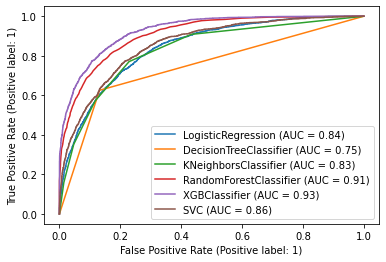

In [220]:
### How well our model works on Testing Data

disp = plot_roc_curve(lr,X_test,y_test)

plot_roc_curve(dt,X_test,y_test, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_test,y_test, ax= disp.ax_)

plot_roc_curve(rf,X_test,y_test, ax= disp.ax_)

plot_roc_curve(xgb,X_test,y_test, ax= disp.ax_)

plot_roc_curve(svc,X_test,y_test, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

WE have again proved that we will use the XGboost Classifier as the best model

- The Logistic Regression is only covering 83% of training data and only 84% of the test data, whereas XGB classifier is covering 97% of training data as well as 93% of test data which is the higest . Random forest may have 100% at train buts its only able to give 91% to test so we will go with Xgboost

- closest to XGboost classifier model is random forest Classifier but the scores a a little better with XGBoost

- theXGboost will be an even better model with Hyperparameter tuning which will increase

### Hyper parameter Tuning

In [222]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xgb = xgb.XGBClassifier()

#Creating parameters to pass in RandomizedSearchCV

parameters = {'gamma': [0.1,0.5,1,10,16,32,64],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.3, 0.2],
              'max_depth': [5,6,7,8,9,10],
              'n_estimators': [80,100,120,130,150,200],
              'reg_alpha': [0.1,0.5,1,10,16,32,64],
              'reg_lambda': [0.1,0.5,1,10,16,32,64]
             }

RCV = RandomizedSearchCV(xgb,parameters, n_jobs = -1, scoring='accuracy')
RCV.fit(X_train_ns,y_train_ns) #fitting data into the model
RCV.best_params_ #printing the best parameters found by the RandomizedSearchCV

{'reg_lambda': 0.1,
 'reg_alpha': 1,
 'n_estimators': 130,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.1}

In [223]:
import xgboost as xgb

xgb = xgb.XGBClassifier(reg_lambda= 10,reg_alpha= 0.1,n_estimators= 200,max_depth= 10,learning_rate= 0.06,gamma= 0.5)

xgb.fit(X_train_ns,y_train_ns)
xgb.score(X_train_ns,y_train_ns)
pred_decision =xgb.predict(X_test)

xgbs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=3)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)
print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 87.34939759036145
Cross Val Score : 86.90067301810124
[[5794  365]
 [ 664 1311]]


We see that after tuning we are abe to increase the score a little bit to 87.35% which is very good as its giving the highest among all the models , we also see that the Cv score is come much closer to the accuracy score @ 86.91% which is great as the closer the score the better the model. let save the xgb model in pickle file

In [224]:
RCV_pred=RCV.best_estimator_.predict(X_test) #predicting with the best parameters
accuracy_score(y_test,RCV_pred) #Checking Final Accuracy

0.8779198426358495

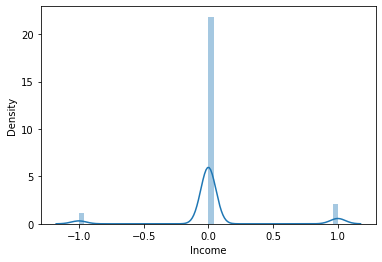

In [225]:
#Plotting distplot to show equillibrium 

sns.distplot(y_test-pred_decision)
plt.show()

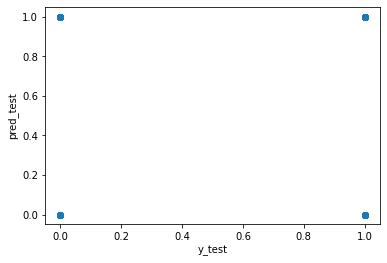

In [226]:
plt.scatter(y_test, pred_decision, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred_test")
plt.show()

We see that the model is accurate as the points in 0 are shown in 0 and 1 in 1 and the graph shows noraml distribution as well 

In [227]:
import pickle
filename = 'census.pkl'
pickle.dump(RCV,open(filename,'wb'))

### Conclusion

In [228]:
loaded_model = pickle.load(open('census.pkl','rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

87.79198426358495


In [229]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],RCV_pred[:]],index=['Predicted','Orignal'])

In [230]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,8124,8125,8126,8127,8128,8129,8130,8131,8132,8133
Predicted,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
Orignal,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


### We have 8134 columns where the model has predicted and Actuals and the model we have chosen is XGboost Classifier as the ideal model for this project